<h1 align="center">Introduction</h1>

<p style="float: left;"><img src="https://raw.githubusercontent.com/jtiosue/qubovert/master/assets/qvfire.png" alt="qvfire" /> </p>

<p style="float: right;"><img src="https://raw.githubusercontent.com/jtiosue/qubovert/master/assets/qvfire.png" alt="qvfire" /> </p>

This notebook is a semi-comprehensive tutorial of qubovert. I say semi-comprehensive for a reason; it is not comprehensive! It is meant to comprehensively cover general themes/topics, which then can be applied everywhere. But in order to fully understand everything you can do with qubovert, you will need to do some exploring of your own beyond this notebook. I've chosen the organization of the tutorial to essentially follow the order of how I actually coded qubovert so that perhaps the motivation for each element will be made clear. Because of this strategy, there are some things that I do in the beginning that could be done cleaner, but I do them for demonstration. By the end though, the general coding style should be clear.

In [1]:
# !pip install qubovert==1.2.4
import qubovert as qv

*This notebook was updated in July 2020 and uses qubovert v1.2.4. There may be newer features available with later versions of qubovert even if this notebook does not show them.*

**Given how big this notebook is, I suggest** installing the Jupyter Notebook Table of Contents extension to help you to navigate this tutorial. You can do this by running the following shell commands

<br/>
<sup>
<span style="margin-left:4em">\$ jupyter nbextension install --user https://rawgithub.com/minrk/ipython_extensions/master/nbextensions/toc.js <br/></span>
<span style="margin-left:4em">\$ curl -L https://rawgithub.com/minrk/ipython_extensions/master/nbextensions/toc.css > $(jupyter --data-dir)/nbextensions/toc.css <br/></span>
<span style="margin-left:4em">\$ jupyter nbextension enable toc <br/></span>
</sup>

and then restarting Jupyter.

## Definitions

**Binary**:
Something that can take on only two possible values.

**Boolean**:
A type of binary value; something that can take values in $\{0, 1 \}$.

**Spin**:
A type of binary value; something that can take values in $\{1, -1 \}$.

**QUBO: Quadratic Unconstrained Boolean Optimization**:
A QUBO is a quadratic function on boolean variables. A QUBO problem then is to find the assignment of boolean values to the variables that gives the minimum function value.

**QUSO: Quadratic Unconstrained Spin Optimization**:
A QUSO is a quadratic function on spin variables. A QUSO problem then is to find the assignment of spin values to the variables that gives the minimum function value.

**PUBO: Polynomial Unconstrained Boolean Optimization**:
A PUBO is a polynomial function on boolean variables. A PUBO problem then is to find the assignment of boolean values to the variables that gives the minimum function value.

**PUSO: Polynomial Unconstrained Spin Optimization**:
A PUSO is a polynomial function on spin variables. A PUSO problem then is to find the assignment of spin values to the variables that gives the minimum function value.

**PCBO: Polynomial Constrained Boolean Optimization**:
A PCBO is a polynomial function on boolean variables along with a set of constraints. A PCBO problem then is to find the assignment of boolean values to the variables that gives the minimum function value and satisfies the constraints.

**PCSO: Polynomial Constrained Spin Optimization**:
A PCSO is a polynomial function on spin variables along with a set of constraints. A PCSO problem then is to find the assignment of spin values to the variables that gives the minimum function value and satisfies the constraints.

***A note on convention***:
We note that the convention that qubovert uses when doing any sort of conversion from boolean values/models to/from spin values/models is the following:

| Boolean | $\leftrightarrow$ |   Spin   |
|---------|-------------------|----------|
|   $0$   | $\leftrightarrow$ |    $1$   |
|   $1$   | $\leftrightarrow$ |   $-1$   |

---
# Motivations for qubovert

These are the initial and ongoing motivations for qubovert. We will build up to our ending coding style. There are some things that I do in the beginning that could be done cleaner, but I do them for demonstration. By the end though, the general coding style should be clear.

*I will be primarily using boolean models as examples (e.g. QUBOs, PUBOs, and PCBOs). Almost everything (besides the boolean logic discussed later) that you can do with boolean models you can also do with the corresponding spin models (e.g. QUSOs, PUSOs, and PCSOs).*

## Motivation #0: general utilities all in one place

There are a bunch of common utilities that we all use when working with boolean and spin optimization. I have rewritten the same handful of functions so many times, that I finally decided to put them into one place where I could always use them.

In [2]:
qv.utils.__all__

('QUBOVertWarning',
 'is_solution_spin',
 'num_bits',
 'sum',
 'approximate_pubo_extrema',
 'approximate_puso_extrema',
 'approximate_qubo_extrema',
 'approximate_quso_extrema',
 'ordering_key',
 'subgraph',
 'subvalue',
 'normalize',
 'pubo_value',
 'qubo_value',
 'puso_value',
 'quso_value',
 'solve_pubo_bruteforce',
 'solve_qubo_bruteforce',
 'solve_puso_bruteforce',
 'solve_quso_bruteforce',
 'DictArithmetic',
 'PUBOMatrix',
 'PUSOMatrix',
 'QUBOMatrix',
 'matrix_to_qubo',
 'qubo_to_matrix',
 'QUSOMatrix',
 'boolean_to_spin',
 'spin_to_boolean',
 'decimal_to_spin',
 'spin_to_decimal',
 'decimal_to_boolean',
 'boolean_to_decimal',
 'qubo_to_quso',
 'quso_to_qubo',
 'pubo_to_puso',
 'puso_to_pubo',
 'Conversions',
 'BO',
 'get_info',
 'create_from_info')

I won't go over all of these right now. Most of them are pretty self-explanatory, or if not they have very descriptive docstrings. If you have a question on any of the utilities, try running `help(utility)`. For example, let's look at the `boolean_to_spin` docstring.

In [3]:
help(qv.utils.boolean_to_spin)

Help on function boolean_to_spin in module qubovert.utils._conversions:

boolean_to_spin(x)
    boolean_to_spin.
    
    Convert a boolean number in {0, 1} to a spin in {1, -1}, in that order.
    
    Parameters
    ----------
    x : int, iterable of ints, or dict mapping labels to ints.
        Each integer is either 0 or 1.
    
    Returns
    -------
    z : int, iterable of ints, or dict mapping labels to ints.
        Each integer is either 1 or -1.
    
    Example
    -------
    >>> boolean_to_spin(0)  # will print 1
    >>> boolean_to_spin(1)  # will print -1
    >>> boolean_to_spin([0, 1, 1])  # will print [1, -1, -1]
    >>> boolean_to_spin({"a": 0, "b": 1})  # will print {"a": 1, "b": -1}



Let's consider we have a boolean bitstring $b = 100101$. We'll encode it in two ways; the first will be `b0 = (1, 0, 0, 1, 0, 1)`, and the second will be `b1 = {0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 1}`. Note that `b0[i]` and `b1[i]` encodes the `i`th value.

In [4]:
b0 = 1, 0, 0, 1, 0, 1
b1 = dict(enumerate(b0))

Let's convert each of these to their corresponding spin strings.

In [5]:
print("b0 -->", qv.utils.boolean_to_spin(b0))
print("b1 -->", qv.utils.boolean_to_spin(b1))

b0 --> (-1, 1, 1, -1, 1, -1)
b1 --> {0: -1, 1: 1, 2: 1, 3: -1, 4: 1, 5: -1}


To ensure consistency, we'll convert to and from.

In [6]:
assert b0 == qv.utils.spin_to_boolean(qv.utils.boolean_to_spin(b0))
assert b1 == qv.utils.spin_to_boolean(qv.utils.boolean_to_spin(b1))

If we consider that $b$ is a binary number, then we can figure out what number it encodes in base 10 via the following.

In [7]:
qv.utils.boolean_to_decimal(b0)

37

Similarly, we can take the spin representation of $b$ and convert it to decimal.

In [8]:
qv.utils.spin_to_decimal(qv.utils.boolean_to_spin(b0))

37

Let's way we have a number $d$ and we want to figure out how to represent it in binary with boolean values.

In [9]:
d = 10
qv.utils.decimal_to_boolean(d)

(1, 0, 1, 0)

This will by default use only as many bits as necessary. But let's say we want to represent it with 7 bits.

In [10]:
qv.utils.decimal_to_boolean(d, num_bits=7)

(0, 0, 0, 1, 0, 1, 0)

Similarly, we can figure out the spin string.

In [11]:
qv.utils.decimal_to_spin(d)

(-1, 1, -1, 1)

In [12]:
qv.utils.decimal_to_spin(d, num_spins=7)

(1, 1, 1, -1, 1, -1, 1)

The `num_bits` function will determine how many bits are needed to represent a number in binary.

In [13]:
qv.utils.num_bits(7)

3

This is a good chance for us to discuss what qubovert calls the `log_trick`. Basically, `log_trick=True` refers to a binary encoding of an integer and `log_trick=False` refers to a (sort of) unary encoding. For example, the encoding of a variable $x$ that can take values between 0 and 7 while setting `log_trick=True` would be $x = \sum_{i=0}^{3} 2^i x_i$; thus `num_bits(7, log_trick=True) = 3`. The encoding of $x$ with `log_trick=False` would be $x = \sum_{i=0}^7 x_i$; thus `num_bits(7, log_trick=False) = 7`.

In [14]:
qv.utils.num_bits(7, log_trick=False)

7

The reason somebody may want to keep `log_trick=True` as it is by default is because it uses less bits to encode an integer. The reason somebody may want to set `log_trick=False` is because it requires no dynamical range of the coefficients. This is sometimes important when running problems on quantum hardware, or even sometimes important just to keep the optimization landscape smoother and thus easier to navigate.

**A QUBO is a function** $f: \{0, 1 \}^n \to \mathbb R$ defined by an $n \times n$ matrix $Q$ so that $$f(x) = x^T Q x = \sum_{i, j=0}^n x_i x_j Q_{ij}.$$ Consider the QUBO function represented by the $Q$ matrix $$Q = \left(\begin{matrix}1&0\\-2&3\end{matrix}\right).$$

In [15]:
Q = [[1, 0], [-2, 3]]

Notice this defines the function $$f(x) = x_0 -2x_0x_1 + x_1.$$

qubovert respresents QUBO functions a little differently because in typical QUBO problems $Q$ is very sparse and so there is no reason for us to be wasting memory storing a lot of zeros. So instead qubovert represents a QUBO as a dictionary mapping products of labels to their coefficients. Let's look at how qubovert would represent the QUBO defined by $Q$.

In [16]:
qubo = qv.utils.matrix_to_qubo(Q)
print(qubo)

{(0,): 1, (0, 1): -2, (1,): 3}


If we want to see a more familiary mathematical expression, we can use the `.pretty_str` method (we can do this because `matrix_to_qubo` actually returns a qubovert type, see a few cells down where I talk about this).

In [17]:
print(qubo.pretty_str())

x(0) - 2 x(0) x(1) + 3 x(1)


Let's say we want to figure out the value of $f(x)$ if $x$ is the vector $x = \left(\begin{matrix}1\\0\end{matrix} \right)$. If we use the $Q$ matrix, then we could use NumPy.

In [18]:
import numpy as np

x = np.array([[1], [0]])
print(x.T @ np.array(Q) @ x)

[[1]]


If we instead want to use qubovert's representation, then we can use the `qubo_value` function.

In [19]:
print(qv.utils.qubo_value(x, qubo))

1


Generally, though, we will let `x` be an assignment represented with a Python `dict`, saying that the 0th variable maps to the value 1 and the 1st variable maps the value 0. This will come in handy as we start labeling variables as strings rather than integers.

In [20]:
x = {0: 1, 1: 0}
print(qv.utils.qubo_value(x, qubo))

1


The similar functions exist for QUSOs, PUBOs, and PUSOs (`quso_value`, `pubo_value`, and `puso_value`). But there's something else we can do too if we wanted. The `matrix_to_qubo` function actually returns a qubovert type `qv.utils.QUBOMatrix` which is very similar to a Python `dict` but has some extra methods attached to it. I will go into much more detail later about what exactly this object is, but for now let's just take advantage of the fact that it has a `.value` method.

In [21]:
print(qubo.value(x))

1


By the way if we wanted to take a QUBO represented with qubovert and convert it to the matrix representation, we can use the `qubo_to_matrix` function. Notice that the matrices $Q_1$ and $Q_2$ define the same function we were talking about before:

$$Q = \left(\begin{matrix}1&0\\-2&3\end{matrix}\right) \qquad Q_1 = \left(\begin{matrix}1&-2\\0&3\end{matrix}\right) \qquad Q_2 = \left(\begin{matrix}1&-1\\-1&3\end{matrix}\right)$$

$$\forall x:~~x^T Q x = x^T Q_1 x = x^T Q_2 x$$

If you do the multiplication, this is clear. qubovert's representation of QUBOs does not have this degeneracy, it picks a form and sticks with it throughout. So we can actually check that these define the same QUBO.

In [22]:
Q = [[1, 0], [-2, 3]]
Q1 = [[1, -2], [0, 3]]
Q2 = [[1, -1], [-1, 3]]

qubo = qv.utils.matrix_to_qubo(Q)
print(qubo == qv.utils.matrix_to_qubo(Q1))
print(qubo == qv.utils.matrix_to_qubo(Q2))

True
True


Notice that $Q_1$ is *upper-triangular* and $Q_2$ is *symmetric*. We can convert the qubovert representation `qubo` back to a matrix and specifiy which form we want it be it. If we set  `symmetric=False` then we will get the upper-triangular form, and if we set `symmetric=True` then we will get the symmetric form.

In [23]:
print(Q1 == qv.utils.qubo_to_matrix(qubo, symmetric=False, array=False))
print(Q2 == qv.utils.qubo_to_matrix(qubo, symmetric=True, array=False))

True
True


Notice also that the `array=False` argument means that the function will return a list of lists representing a matrix (the same way we made our matrices above). But if you leave `array=True` then it will return a NumPy array.

In [24]:
print(qv.utils.qubo_to_matrix(qubo, array=False))
print(qv.utils.qubo_to_matrix(qubo, array=True))

[[1.0, -2.0], [0.0, 3.0]]
[[ 1. -2.]
 [ 0.  3.]]


I'll discuss most of the rest of the `qubovert.utils` library later in this notebook. In particular, please see the [Advanced details](#Advanced-details) section below for usage of the `solve_bruteforce`, `subgraph`, `subvalue`, and `normalize` functions. I will discuss/use the conversion functions (e.g. `qubo_to_quso`, `puso_to_pubo`, etc.) throughout the rest of the [Motivations for qubovert](#Motivations-for-qubovert) section, and I will mention some important details about them in the [Summary of the main qubovert functionality](#Summary-of-the-main-qubovert-functionality) section below.

## Motiviation #1: arithmetic

The first motivation was that performing arithmetic with dicts is arduous and buggy, and it's often hard to find exactly where a bug is occurring. Consider for example a Polynomial Unconstrained Boolean Optimization (PUBO) problem $F: \{0, 1 \}^{n} \times \{0, 1 \}^n \to \mathbb R$ whose groundstate encodes the factors of $N$ where $n$ is defined to be the number of bits required to encode integers up to $\lfloor N / 2 \rfloor$,

$$F(x, y) = \left(N - \left(2+\sum_{i=0}^n 2^i x_i\right)\left(2+\sum_{i=0}^n 2^i y_i\right) \right)^2.$$

For our example we'll set $N = 9$.

In [25]:
N = 9
n = qv.utils.num_bits(N // 2)
print(n)

3


If $F(x, y) = 0$, then $x := 2+\sum_{i=0}^n 2^i x_i$ is a nontrivial factor of $N$ and $y := 2+\sum_{i=0}^n 2^i y_i$ is a factor. *Of course finding factors in this way is not advised, seeing as PUBOs are in general harder to solve than the factoring problem, and there isn't really a notion of being close to the right solution and so the optimization landscape has no good information to help in finding the groudstate*. Nonetheless, this will serve as an interesting example for much of this notebook.

Recall that we generally encode binary functions as Python dictionaries. So for example, something like $$f(x_0, x_1, x_2) = -x_0x_1x_2 + x_0x_1 + 2 x_1 - 3 x_2 + 4$$ would be encoded in Python as 

    f = {(0, 1, 2): -1, (0, 1): 1, (1,): 2, (2,): -3, (): 4}
    
Thus to encode $F$ we need to expand it out as

$$
\begin{aligned}
F(x, y) &= \left(N - \left(2+\sum_{i=0}^n 2^i x_i\right)\left(2+\sum_{i=0}^n 2^i y_i\right) \right)^2\\
&= \left(N - 4 - 2 \sum_{i=0}^n 2^i (x_i + y_i) - \sum_{i, j=0}^n 2^{i+j} x_i y_j \right)\left(N - 4 - 2 \sum_{i=0}^n 2^i (x_i + y_i) - \sum_{i, j=0}^n 2^{i+j} x_i y_j \right)\\
&= \dots\\
&= \dots
\end{aligned}
$$

Honestly I had the full intention of going through all of that arithmetic but I just really don't want to. **This was the motivation for the `DictArithmetic` object in qubovert**. This object deals with arbitrary arithmetic with dictionaries. It it a direct child class of `dict` as seen by the Method Resolution Order (MRO).

In [26]:
qv.utils.DictArithmetic.mro()

[qubovert.utils._dict_arithmetic.DictArithmetic, dict, object]

Most arithmetic operations are defined. For example, `*`, `+`, `-`, `/`, `//`, `**`, `*=`, `+=`, `-=`, `/=`, `//=`, and `**=` are all defined, as well as the `round` method.

So let's create $F$ with `DictArithmetic` so that I don't have to go through all of that crazy arithmetic and surely get caught in math and coding bugs. We'll start off by creating each $x_i$ and $y_i$, which will be dictionaries `{('xi',): 1}`.

In [27]:
x_vars = [qv.utils.DictArithmetic({('x%d' % i,): 1}) for i in range(n)]
y_vars = [qv.utils.DictArithmetic({('y%d' % i,): 1}) for i in range(n)]

print(x_vars)
print(y_vars)

[{('x0',): 1}, {('x1',): 1}, {('x2',): 1}]
[{('y0',): 1}, {('y1',): 1}, {('y2',): 1}]


Now we can literally just write out $x,y$ as we would with math.

In [28]:
x = 2 + sum(2**i * x_vars[i] for i in range(n))
y = 2 + sum(2**i * y_vars[i] for i in range(n))

print(x)
print(y)

{('x0',): 1, ('x1',): 2, ('x2',): 4, (): 2}
{('y0',): 1, ('y1',): 2, ('y2',): 4, (): 2}


And similarly $F$.

In [29]:
F = (N - x * y) ** 2
print(F)

{('x0', 'y0', 'x0', 'y0'): 1, ('x0', 'y0', 'x0', 'y1'): 2, ('x0', 'y0', 'x0', 'y2'): 4, ('x0', 'y0', 'x0'): 2, ('x0', 'y0', 'x1', 'y0'): 2, ('x0', 'y0', 'x1', 'y1'): 4, ('x0', 'y0', 'x1', 'y2'): 8, ('x0', 'y0', 'x1'): 4, ('x0', 'y0', 'x2', 'y0'): 4, ('x0', 'y0', 'x2', 'y1'): 8, ('x0', 'y0', 'x2', 'y2'): 16, ('x0', 'y0', 'x2'): 8, ('x0', 'y0', 'y0'): 2, ('x0', 'y0', 'y1'): 4, ('x0', 'y0', 'y2'): 8, ('x0', 'y0'): -6, ('x0', 'y1', 'x0', 'y0'): 2, ('x0', 'y1', 'x0', 'y1'): 4, ('x0', 'y1', 'x0', 'y2'): 8, ('x0', 'y1', 'x0'): 4, ('x0', 'y1', 'x1', 'y0'): 4, ('x0', 'y1', 'x1', 'y1'): 8, ('x0', 'y1', 'x1', 'y2'): 16, ('x0', 'y1', 'x1'): 8, ('x0', 'y1', 'x2', 'y0'): 8, ('x0', 'y1', 'x2', 'y1'): 16, ('x0', 'y1', 'x2', 'y2'): 32, ('x0', 'y1', 'x2'): 16, ('x0', 'y1', 'y0'): 4, ('x0', 'y1', 'y1'): 8, ('x0', 'y1', 'y2'): 16, ('x0', 'y1'): -12, ('x0', 'y2', 'x0', 'y0'): 4, ('x0', 'y2', 'x0', 'y1'): 8, ('x0', 'y2', 'x0', 'y2'): 16, ('x0', 'y2', 'x0'): 8, ('x0', 'y2', 'x1', 'y0'): 8, ('x0', 'y2', 'x1',

*Notice that `DictArithmetic` does not use any simplification assumptions!* It does not assume commutation and will thus differentiate between something like $x_0 x_1$ and $x_1 x_0$. That's why you see terms like `('x0', 'y0', 'x0', 'y0'): 1` which corresponds to $x_0 y_0 x_0 y_0$. But we know that these are boolean variables with each $x_i, y_i \in \{0, 1 \}$, so we know that $x_0 y_0 x_0 y_0 = x_0y_0 = y_0 x_0$. Thus we have the motivation for the `PUBO` object. Let's convert `F` to a `PUBO`.

In [30]:
F_PUBO = qv.PUBO(F)

print(F_PUBO)

{('y0', 'x0'): 7, ('y0', 'x0', 'y1'): 20, ('y0', 'x0', 'y2'): 40, ('y0', 'x0', 'x1'): 20, ('y0', 'x0', 'x1', 'y1'): 16, ('y0', 'x0', 'x1', 'y2'): 32, ('x2', 'y0', 'x0'): 40, ('x2', 'y0', 'x0', 'y1'): 32, ('x2', 'y0', 'x0', 'y2'): 64, ('x0', 'y1'): 24, ('x0', 'y2', 'y1'): 80, ('x0', 'x1', 'y1'): 48, ('x0', 'x1', 'y2', 'y1'): 64, ('x2', 'x0', 'y1'): 96, ('x2', 'x0', 'y2', 'y1'): 128, ('x0', 'y2'): 88, ('x0', 'x1', 'y2'): 128, ('x2', 'x0', 'y2'): 256, ('x0',): -16, ('x0', 'x1'): 16, ('x2', 'x0'): 32, ('y0', 'x1'): 24, ('y0', 'x1', 'y1'): 48, ('y0', 'x1', 'y2'): 96, ('x2', 'y0', 'x1'): 80, ('x2', 'y0', 'x1', 'y1'): 64, ('x2', 'y0', 'x1', 'y2'): 128, ('x1', 'y1'): 72, ('x1', 'y2', 'y1'): 192, ('x2', 'x1', 'y1'): 192, ('x2', 'x1', 'y2', 'y1'): 256, ('x1', 'y2'): 240, ('x2', 'x1', 'y2'): 512, ('x1',): -24, ('x2', 'x1'): 64, ('x2', 'y0'): 88, ('x2', 'y0', 'y1'): 128, ('x2', 'y0', 'y2'): 256, ('x2', 'y1'): 240, ('x2', 'y2', 'y1'): 512, ('x2', 'y2'): 736, ('x2',): -16, ('y0',): -16, ('y0', 'y1')

Notice how much smaller it is, and how it is now fully simplified in its expanded form! Now there is a lot of inheritence going on with the `PUBO` object, but for now I just want you to notice that at the bottom of its MRO we see the `DictArithmetic` working in the background to do all of the arithmetic!

In [31]:
qv.PUBO.mro()

[qubovert._pubo.PUBO,
 qubovert.utils._bo_parentclass.BO,
 qubovert.utils._conversions.Conversions,
 qubovert.utils._pubomatrix.PUBOMatrix,
 qubovert.utils._dict_arithmetic.DictArithmetic,
 dict,
 object]

So from now on, we can totally ignore the `DictArithmetic` object and instead start right away with a `PUBO`. We can create variables in the same exact way as before, but replacing `qv.utils.DictArithmetic` with `qv.PUBO`.

In [32]:
x_vars = [qv.PUBO({('x%d' % i,): 1}) for i in range(n)]
y_vars = [qv.PUBO({('y%d' % i,): 1}) for i in range(n)]

x = 2 + sum(2**i * x_vars[i] for i in range(n))
y = 2 + sum(2**i * y_vars[i] for i in range(n))

F = (N - x * y) ** 2
print(F)

{('y0', 'x0', 'y1'): 20, ('y0', 'x0', 'y2'): 40, ('y0', 'x0', 'x1'): 20, ('y0', 'x0', 'x1', 'y1'): 16, ('y0', 'x0', 'x1', 'y2'): 32, ('x2', 'y0', 'x0'): 40, ('x2', 'y0', 'x0', 'y1'): 32, ('x2', 'y0', 'x0', 'y2'): 64, ('x0', 'y1'): 24, ('x0', 'y2', 'y1'): 80, ('x0', 'x1', 'y1'): 48, ('x0', 'x1', 'y2', 'y1'): 64, ('x2', 'x0', 'y1'): 96, ('x2', 'x0', 'y2', 'y1'): 128, ('x0', 'y2'): 88, ('x0', 'x1', 'y2'): 128, ('x2', 'x0', 'y2'): 256, ('y0', 'x0'): 7, ('x0',): -16, ('x0', 'x1'): 16, ('x2', 'x0'): 32, ('y0', 'x1'): 24, ('y0', 'x1', 'y1'): 48, ('y0', 'x1', 'y2'): 96, ('x2', 'y0', 'x1'): 80, ('x2', 'y0', 'x1', 'y1'): 64, ('x2', 'y0', 'x1', 'y2'): 128, ('x1', 'y1'): 72, ('x1', 'y2', 'y1'): 192, ('x2', 'x1', 'y1'): 192, ('x2', 'x1', 'y2', 'y1'): 256, ('x1', 'y2'): 240, ('x2', 'x1', 'y2'): 512, ('x1',): -24, ('x2', 'x1'): 64, ('x2', 'y0'): 88, ('x2', 'y0', 'y1'): 128, ('x2', 'y0', 'y2'): 256, ('x2', 'y1'): 240, ('x2', 'y2', 'y1'): 512, ('x2', 'y2'): 736, ('x2',): -16, ('y0',): -16, ('y0', 'y1')

In [33]:
F == F_PUBO

True

One further simplification we could make is to replace

    qv.PUBO({(var,): 1})

with

    qv.PUBO.create_var(var)

This will create a `PUBO` object for that variable. We an also do that with the `DictArithmetic` object, and indeed every other qubovert object. This method will also set the name of the variable.

In [34]:
x = qv.utils.DictArithmetic.create_var('x')
y = qv.PUBO.create_var('y')
print(x.name, type(x) == qv.utils.DictArithmetic, x)
print(y.name, type(y) == qv.PUBO, y)

x True {('x',): 1}
y True {('y',): 1}


Thus we can make our `F_PUBO` as follows.

In [35]:
x_vars = [qv.PUBO.create_var('x%d' % i) for i in range(n)]
y_vars = [qv.PUBO.create_var('y%d' % i) for i in range(n)]

x = 2 + sum(2**i * x_vars[i] for i in range(n))
y = 2 + sum(2**i * y_vars[i] for i in range(n))

F = (N - x * y) ** 2
print(F)

{('y0', 'x0', 'y1'): 20, ('y0', 'x0', 'y2'): 40, ('y0', 'x0', 'x1'): 20, ('y0', 'x0', 'x1', 'y1'): 16, ('y0', 'x0', 'x1', 'y2'): 32, ('x2', 'y0', 'x0'): 40, ('x2', 'y0', 'x0', 'y1'): 32, ('x2', 'y0', 'x0', 'y2'): 64, ('x0', 'y1'): 24, ('x0', 'y2', 'y1'): 80, ('x0', 'x1', 'y1'): 48, ('x0', 'x1', 'y2', 'y1'): 64, ('x2', 'x0', 'y1'): 96, ('x2', 'x0', 'y2', 'y1'): 128, ('x0', 'y2'): 88, ('x0', 'x1', 'y2'): 128, ('x2', 'x0', 'y2'): 256, ('y0', 'x0'): 7, ('x0',): -16, ('x0', 'x1'): 16, ('x2', 'x0'): 32, ('y0', 'x1'): 24, ('y0', 'x1', 'y1'): 48, ('y0', 'x1', 'y2'): 96, ('x2', 'y0', 'x1'): 80, ('x2', 'y0', 'x1', 'y1'): 64, ('x2', 'y0', 'x1', 'y2'): 128, ('x1', 'y1'): 72, ('x1', 'y2', 'y1'): 192, ('x2', 'x1', 'y1'): 192, ('x2', 'x1', 'y2', 'y1'): 256, ('x1', 'y2'): 240, ('x2', 'x1', 'y2'): 512, ('x1',): -24, ('x2', 'x1'): 64, ('x2', 'y0'): 88, ('x2', 'y0', 'y1'): 128, ('x2', 'y0', 'y2'): 256, ('x2', 'y1'): 240, ('x2', 'y2', 'y1'): 512, ('x2', 'y2'): 736, ('x2',): -16, ('y0',): -16, ('y0', 'y1')

In [36]:
F == F_PUBO

True

So that now solves our arithmetic problem! Creating the PUBO of $F$ took 5 easy lines of code with qubovert, whereas without qubovert we would have had to multiply out that really annoying expression, perform the simplification ourselves, and then code it into a `dict` with a bunch of for loops and if statements!

## Motivation #2: integer labeling

The second motivation for qubovert was the necessity to integer label expressions. Many PUBO solvers only accept PUBOs that are integer labeled because they end up solving your problem via C, C++, or something similar and they use arrays to store all of the information. Arrays need to be indexed by integers! Thus they won't accept a PUBO like `{('x0', 'x1'): 1, ('x1', 'y_1'): -2}, ...`. We instead need to create some sort of enumeration mapping that maps the original string labels to integer labels, and then we need to keep track of this mapping because we will need to map the solution back!

We'll use our $F$ from before as an example. Recall that `F` is a `qubovert.PUBO` object, and it has variables labeled `'x0'`, `'y0'`, etc. We can get this to be labeled via integer labels with the `.to_pubo` method.

In [37]:
int_F = F.to_pubo()
print(int_F)
print()
print(int_F.pretty_str())

{(0, 1, 2): 20, (0, 1, 3): 40, (0, 1, 4): 20, (0, 1, 2, 4): 16, (0, 1, 3, 4): 32, (0, 1, 5): 40, (0, 1, 2, 5): 32, (0, 1, 3, 5): 64, (1, 2): 24, (1, 2, 3): 80, (1, 2, 4): 48, (1, 2, 3, 4): 64, (1, 2, 5): 96, (1, 2, 3, 5): 128, (1, 3): 88, (1, 3, 4): 128, (1, 3, 5): 256, (0, 1): 7, (1,): -16, (1, 4): 16, (1, 5): 32, (0, 4): 24, (0, 2, 4): 48, (0, 3, 4): 96, (0, 4, 5): 80, (0, 2, 4, 5): 64, (0, 3, 4, 5): 128, (2, 4): 72, (2, 3, 4): 192, (2, 4, 5): 192, (2, 3, 4, 5): 256, (3, 4): 240, (3, 4, 5): 512, (4,): -24, (4, 5): 64, (0, 5): 88, (0, 2, 5): 128, (0, 3, 5): 256, (2, 5): 240, (2, 3, 5): 512, (3, 5): 736, (5,): -16, (0,): -16, (0, 2): 16, (0, 3): 32, (2,): -24, (2, 3): 64, (3,): -16, (): 25}

20 x(0) x(1) x(2) + 40 x(0) x(1) x(3) + 20 x(0) x(1) x(4) + 16 x(0) x(1) x(2) x(4) + 32 x(0) x(1) x(3) x(4) + 40 x(0) x(1) x(5) + 32 x(0) x(1) x(2) x(5) + 64 x(0) x(1) x(3) x(5) + 24 x(1) x(2) + 80 x(1) x(2) x(3) + 48 x(1) x(2) x(4) + 64 x(1) x(2) x(3) x(4) + 96 x(1) x(2) x(5) + 128 x(1) x(2) x(3) 

What exactly is `int_F`?

In [38]:
type(int_F)

qubovert.utils._pubomatrix.PUBOMatrix

It's a `PUBOMatrix` object. Again we see that at the bottom of its MRO is the `DictArithmetic` class.

In [39]:
qv.utils.PUBOMatrix.mro()

[qubovert.utils._pubomatrix.PUBOMatrix,
 qubovert.utils._dict_arithmetic.DictArithmetic,
 dict,
 object]

The `PUBOMatrix` encodes PUBOs that are labeled with integer labels.

In [40]:
pubomatrix = qv.utils.PUBOMatrix()
pubomatrix[(0, 1, 2)] = 1
print(pubomatrix)

{(0, 1, 2): 1}


Just like the `PUBO` object, it will recognize that the variables are boolean and will therefore perform simplifications. For example,

In [41]:
pubomatrix[(0, 0, 0, 1, 1, 1, 1, 3)] = -2
print(pubomatrix)

{(0, 1, 2): 1, (0, 1, 3): -2}


In [42]:
pubomatrix[(0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0)] -= 1
print(pubomatrix)

{(0, 1, 3): -2}


But if we try to add a variable label that is not an integer, it will raise an error.

In [43]:
pubomatrix = qv.utils.PUBOMatrix()
try:
    pubomatrix[(0, 'x')] = 1
except KeyError as e:
    print(e)

'Key formatted incorrectly, must be tuple of non negative integers'


But of course this works fine with the `PUBO` object!

In [44]:
pubo = qv.PUBO()
pubo[(0, 'x')] = 1
print(pubo)

{('x', 0): 1}


So anyways, back to `F` and `int_F`.

In [45]:
int_F = F.to_pubo()
print("F vars:", F.variables)
print("int_F vars:", int_F.variables)

F vars: {'y2', 'x0', 'y1', 'x2', 'x1', 'y0'}
int_F vars: {0, 1, 2, 3, 4, 5}


We can see what each variable in `F` maps to in `int_F`, and vice versa.

In [46]:
print("F -> int_F:", F.mapping)
print("int_F -> F:", F.reverse_mapping)

F -> int_F: {'y0': 0, 'x0': 1, 'y1': 2, 'y2': 3, 'x1': 4, 'x2': 5}
int_F -> F: {0: 'y0', 1: 'x0', 2: 'y1', 3: 'y2', 4: 'x1', 5: 'x2'}


Now let's say we send away `inf_F` to be solved by some random software package that solves (ie minimizes) PUBOs. Let's simulate that by just using qubovert's bruteforce solver.

In [47]:
int_F_solution = int_F.solve_bruteforce()
print(int_F_solution)

{0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0}


We could of course use `F.reverse_mapping` to convert each of the integer variable names back to their original names, or we can use `F.convert_solution` which does it for us!

In [48]:
F_solution = F.convert_solution(int_F_solution)
print(F_solution)

{'y0': 1, 'x0': 1, 'y1': 0, 'y2': 0, 'x1': 0, 'x2': 0}


Recall that we said that the solution to $F(x, y) = 0$ makes $x := 2 + \sum_{i=0}^n 2^i x_i$ and $y := 2 + \sum_{i=0}^n 2^i y_i$ nontrivial factors. Given our assignment of variables in `F_solution` we can calculate these with the `.value` method.

In [49]:
print("x =", x.value(F_solution))
print("y =", y.value(F_solution))
print("F(x, y) =", F.value(F_solution))

x = 3
y = 3
F(x, y) = 0


Thus we have that $3 \times 3 = 9$! Just an FYI for testing purposes, if you really are just using qubovert's bruteforce solver, then you don't have to convert your PUBO to a integer labeled PUBO.

In [50]:
F_solution = F.solve_bruteforce()
print(F_solution)
print("x =", x.value(F_solution))
print("y =", y.value(F_solution))
print("F(x, y) =", F.value(F_solution))

{'y0': 1, 'x0': 1, 'y1': 0, 'y2': 0, 'x1': 0, 'x2': 0}
x = 3
y = 3
F(x, y) = 0


Okay cool. But what happens now if an integer labeled PUBO isn't enough...what happens if the solver you are using requires your PUBO to actually be degree 2? In other words, a Quadratic Unconstrained Boolean Optimization (QUBO) problem. Well right now our PUBO $F$ is not a QUBO because it is degree 4!

In [51]:
F.degree

4

Indeed if we try to force it be a QUBO we'll get an error!

In [52]:
try:
    qv.QUBO(F)
except KeyError as e:
    print(e)

'Key formatted incorrectly, must be tuple of <= 2 unique elements. See PUBO for arbitrary numbers of unique elements.'


So how can we do this? Well this brings us to the next motivation.

## Motivation #3: degree reduction

To reduce the degree of a PUBO, we introduce ancilla variables and enforce that they are equal to a product of two real variables by adding a penalty to the PUBO. For example, we note that for a sufficiently large $\lambda$, the following equality holds:

$$\min_{x, y, z \in \{0, 1\}} x y z = \min_{x, y, z, a \in \{0, 1 \}}\left( az + \lambda f(a, x, y) \right)$$

where $f: \{0, 1\} \times \{0, 1\} \times \{0, 1\} \to \mathbb R$ is a function such that

$$f(a, x, y)~~\begin{cases}
=0&\text{if }a = xy,\\
>0&\text{else,}
\end{cases}$$

and, crucially, `f` must be a QUBO! We know of such an `f`. We can access it from the Polynomial Constrained Boolean Optimization (PCBO) object. I'll explain this object in way more detail later! But for now, I just want to use it to show you want `f` looks like. The `add_constraint_eq_AND(a, x, y)` method enforces that $a == x \land y$.

In [53]:
from itertools import product

f = qv.PCBO().add_constraint_eq_AND('a', 'x', 'y')

for i, j, k in product((0, 1), repeat=3):
    assignment = {'a': i, 'x': j, 'y': k}
    print(assignment, '  -->  ', f.value(assignment))

{'a': 0, 'x': 0, 'y': 0}   -->   0
{'a': 0, 'x': 0, 'y': 1}   -->   0
{'a': 0, 'x': 1, 'y': 0}   -->   0
{'a': 0, 'x': 1, 'y': 1}   -->   1
{'a': 1, 'x': 0, 'y': 0}   -->   3
{'a': 1, 'x': 0, 'y': 1}   -->   1
{'a': 1, 'x': 1, 'y': 0}   -->   1
{'a': 1, 'x': 1, 'y': 1}   -->   0


But we don't have to deal with going through and picking out products of variables to reduce, keeping track of the new variables we introduce, and adding the right penalties -- that's where qubovert comes in! qubovert will perform degree reduction by trying to find the most common pairs of variables that are together and choosing them to represent as an ancilla.

Recall that our PUBO `F` is degree 4. Let's create a PUBO that is degree 3 called `deg_3_F`.

In [54]:
deg_3_F = F.to_pubo(deg=3)

print("F:")
print("   number of variables : ", F.num_binary_variables)
print("   degree              : ", F.degree)
print("   variables           : ", F.variables)
print("deg_3_F:")
print("   number of variables : ", deg_3_F.num_binary_variables)
print("   degree              : ", deg_3_F.degree)
print("   variables           : ", deg_3_F.variables)

F:
   number of variables :  6
   degree              :  4
   variables           :  {'y2', 'x0', 'y1', 'x2', 'x1', 'y0'}
deg_3_F:
   number of variables :  10
   degree              :  3
   variables           :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


A few things to notice. First we did not specify $\lambda$. That's because qubovert will automatically pick values for you that are *guarenteed* to adequetely enforce the pair reduction constriant. However, if you want to specify $\lambda$ yourself, you can via the `lam` argument (ie `deg_3_F = F.to_pubo(deg=3, lam=5)`. Indeed for the `lam` argument and a few other optional arguments, please see the [Tips, tricks, and advanced details](#Tips,-tricks,-and-advanced-details) section.

Also notice that 4 more variables were introduced and that the variables are now integer labeled. In particular, `deg_3_F` is again a `PUBOMatrix`! We do a similar process now as above to work with `deg_3_F` and convert the solution to this PUBO back to a solution to `F`.

In [55]:
deg_3_F_solution = deg_3_F.solve_bruteforce()
F_solution = F.convert_solution(deg_3_F_solution)

print("x =", x.value(F_solution))
print("y =", y.value(F_solution))
print("F(x, y) =", F.value(F_solution))

x = 3
y = 3
F(x, y) = 0


***A note on degree reduction***

Choosing an optimal way of reducing a general PUBO to a QUBO is NP-hard. One basic pattern that qubovert uses is shown in the following example. Consider 
$$C_3 = -wxy - xyz.$$

Using the method discussed above, we can create the QUBO $C_2$ by adding two ancilla variables with

$$C_2 = -a_0 y - a_1 z + \lambda_0 f(a_0, w, x) + \lambda_1 f(a_1, x, y).$$

However, we can do better by noticing that the product $xy$ occurs in both terms. Thus we only need to indroduce one ancilla variable with

$$C_2' = -wa - az + \lambda f(a, x, y).$$

This general idea of finding frequently repeated pairs of bits is used by qubovert. However, qubovert's degree reduction is not guarenteed to be optimal.

Now what if we want to reduce `F` to a QUBO? We could do the same as above, and use `F.to_pubo(deg=3)`. But this will still return a `PUBOMatrix` object. But this is **qubo**vert for crying out loud! We have `QUBOMatrix` objects too! We'll see a little later that sometimes we will prefer to have a `QUBO` or `QUBOMatrix` object as opposed to a `PUBO` or `PUBOMatrix` object. But for now, I'll just show you how to do it. Again, we could provide a `lam` argument in the following method call, but otherwise qubovert picks one out for us.

In [56]:
qubo_F = F.to_qubo()

print("F:")
print("   number of variables : ", F.num_binary_variables)
print("   degree              : ", F.degree)
print("   variables           : ", F.variables)
print("qubo_F:")
print("   number of variables : ", qubo_F.num_binary_variables)
print("   degree              : ", qubo_F.degree)
print("   variables           : ", qubo_F.variables)

qubo_F_solution = qubo_F.solve_bruteforce()
F_solution = F.convert_solution(qubo_F_solution)

print("x =", x.value(F_solution))
print("y =", y.value(F_solution))
print("F(x, y) =", F.value(F_solution))

F:
   number of variables :  6
   degree              :  4
   variables           :  {'y2', 'x0', 'y1', 'x2', 'x1', 'y0'}
qubo_F:
   number of variables :  13
   degree              :  2
   variables           :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
x = 3
y = 3
F(x, y) = 0


We see that even more variables needed to be introduced to reduce the degree all the way down to 2. You may have noticed solving the QUBO bruteforce took a little longer than solving the other models. That's because we're now at 13 variables! We will quickly lose the ability to do a bruteforce search of the solution space to find the best solution. So instead we might want to find other solvers. The first is a popular one -- D-Wave.

## Motivation #4: working with D-Wave

D-Wave exclusively solves degree 2 binary models, namely QUBOs or QUSOs, where QUSO is exactly the same as QUBO, but "(B)oolean" -> "(S)pin", thus Quadratic Unconstrained Spin Optimization. Let's go back to our `F` example. We could just use the `F` `PUBO` object that we already have defined above. But just for kicks, let's define it again, just so I can show another nice way of creating PUBOs.

In [57]:
x = 2 + qv.PUBO({('x%d' % i,): 2**i for i in range(n)})
y = 2 + qv.PUBO({('y%d' % i,): 2**i for i in range(n)})
F = (N - x * y) ** 2

Recall this is a degree 4 PUBO. Let's reduce it to a QUBO with the `.to_qubo` method, then solve it with D-Wave's simulated annealer, then convert the best solution that D-Wave found back to a solution to the original PUBO. Everything below should look very similar! The only new feature is the following. D-Wave defines their QUBOs slightly differently than qubovert does. qubovert encodes terms with a single variable, for example $2x_0$, like `{('x0',): 2}`, whereas D-Wave would encode the same expression as `{('x0', 'x0'): 2}`. Recall that qubovert will explicitly convert D-wave's form to qubovert's form! See for example here:

In [58]:
dwave_term = {('x0', 'x0'): 2}
qubovert_term = qv.QUBO(dwave_term)
print(qubovert_term)

{('x0',): 2}


We can get D-Wave's form back via the `.Q` property.

In [59]:
print(qubovert_term.Q)

{('x0', 'x0'): 2}


Note though that this means that an offset term in a QUBO will be ignored when converting it to D-Wave's form!

In [60]:
qv_qubo = qv.QUBO() + {('x0',): 1, ('x0', 'x1'): 2, (): -1}
print("qubovert's QUBO : ", qv_qubo)
print("D-Wave's QUBO   : ", qv_qubo.Q)
print("offset          : " , qv_qubo.offset)

qubovert's QUBO :  {('x0',): 1, ('x0', 'x1'): 2, (): -1}
D-Wave's QUBO   :  {('x0', 'x0'): 1, ('x0', 'x1'): 2}
offset          :  -1


Always keep this in mind when working with D-Wave. Okay well now we can go right ahead and do it. First we recreate the QUBO with the `F.to_qubo()` method. Then we convert it to D-Wave's form via the `.Q` property.

In [61]:
qubo_F = F.to_qubo()
dwave_F = qubo_F.Q
print(dwave_F)

{(6, 6): 816, (0, 1): 279, (0, 6): -544, (1, 6): -544, (2, 6): 20, (3, 6): 40, (4, 6): 20, (7, 7): 2127, (2, 4): 781, (2, 7): -1418, (4, 7): -1418, (6, 7): 16, (8, 8): 2511, (3, 4): 1077, (3, 8): -1674, (4, 8): -1674, (6, 8): 32, (5, 6): 40, (9, 9): 2220, (2, 5): 980, (2, 9): -1480, (5, 9): -1480, (6, 9): 32, (10, 10): 3282, (3, 5): 1830, (3, 10): -2188, (5, 10): -2188, (6, 10): 64, (1, 2): 445, (11, 11): 1263, (1, 11): -842, (2, 11): -842, (3, 11): 80, (4, 11): 48, (8, 11): 64, (5, 11): 96, (10, 11): 128, (1, 3): 88, (1, 8): 128, (1, 10): 256, (1, 1): -16, (1, 4): 16, (1, 5): 32, (0, 4): 299, (0, 7): 48, (0, 8): 96, (12, 12): 825, (0, 12): -550, (4, 12): -550, (5, 12): 80, (9, 12): 64, (10, 12): 128, (3, 7): 192, (5, 7): 192, (7, 10): 256, (5, 8): 512, (4, 4): -24, (4, 5): 64, (0, 5): 88, (0, 9): 128, (0, 10): 256, (3, 9): 512, (5, 5): -16, (0, 0): -16, (0, 2): 16, (0, 3): 32, (2, 2): -24, (2, 3): 64, (3, 3): -16}


Next we solve the QUBO with D-Wave's simulated annealer by sampling 1000 times.

In [62]:
# !pip install dwave-neal
from neal import SimulatedAnnealingSampler as SAS  # D-Wave's simluated annealing

res = SAS().sample_qubo(dwave_F, num_reads=1000)
dwave_F_solution = res.first.sample

print("dwave_F_solution :", dwave_F_solution)
print("Resulting F value:", res.first.energy + qubo_F.offset)

dwave_F_solution : {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}
Resulting F value: 0.0


Next we'll use the `F.convert_solution` function to convert this back to our original variables.

In [63]:
F_solution = F.convert_solution(dwave_F_solution)

print("F_solution =", F_solution)
print("x =", x.value(F_solution))
print("y =", y.value(F_solution))
print("F(x, y) =", F.value(F_solution))

F_solution = {'y0': 1, 'x0': 1, 'y1': 0, 'y2': 0, 'x1': 0, 'x2': 0}
x = 3
y = 3
F(x, y) = 0


And we're done. Now let's do the same exact thing, but this time by converting the PUBO to a QUSO with the `.to_quso` method. Note that this method will reduce the degree of the PUBO to quadratic just like the `.to_qubo` method did, and it will convert the resulting QUBO to QUSO by replacing each variable $x \in \{0, 1 \}$ with $z \in \{1, -1 \}$ via $x = \frac{1-z}{2}$.

In [64]:
quso_F = F.to_quso()
print(quso_F == qv.utils.qubo_to_quso(F.to_qubo()))

True


Finally, similar to the `.Q` property with QUBOs, D-Wave accepts a different form for QUSOs than qubovert's form. They accept a dictionary representing the linear terms $h$ and a dictionary representing the spin couplings $J$. We can get these with the `quso.h` and `quso.J` properties. Note just like before that we will ignore the offset!

In [65]:
print("offset        : ", quso_F.offset)
print()
print("linear terms  : ", quso_F.h)
print()
print("couplng terms : ", quso_F.J)

offset        :  4547.75

linear terms  :  {6: -202.0, 0: -29.0, 1: 43.5, 2: 370.5, 3: -5.25, 4: 346.25, 7: -530.5, 8: -626.5, 5: -53.5, 9: -554.0, 10: -819.0, 11: -314.5, 12: -205.5}

couplng terms :  {(0, 1): 69.75, (0, 6): -136.0, (1, 6): -136.0, (2, 6): 5.0, (3, 6): 10.0, (4, 6): 5.0, (2, 4): 195.25, (2, 7): -354.5, (4, 7): -354.5, (6, 7): 4.0, (3, 4): 269.25, (3, 8): -418.5, (4, 8): -418.5, (6, 8): 8.0, (5, 6): 10.0, (2, 5): 245.0, (2, 9): -370.0, (5, 9): -370.0, (6, 9): 8.0, (3, 5): 457.5, (3, 10): -547.0, (5, 10): -547.0, (6, 10): 16.0, (1, 2): 111.25, (1, 11): -210.5, (2, 11): -210.5, (3, 11): 20.0, (4, 11): 12.0, (8, 11): 16.0, (5, 11): 24.0, (10, 11): 32.0, (1, 3): 22.0, (1, 8): 32.0, (1, 10): 64.0, (1, 4): 4.0, (1, 5): 8.0, (0, 4): 74.75, (0, 7): 12.0, (0, 8): 24.0, (0, 12): -137.5, (4, 12): -137.5, (5, 12): 20.0, (9, 12): 16.0, (10, 12): 32.0, (3, 7): 48.0, (5, 7): 48.0, (7, 10): 64.0, (5, 8): 128.0, (4, 5): 16.0, (0, 5): 22.0, (0, 9): 32.0, (0, 10): 64.0, (3, 9): 128.0, (0

Next we solve the QUSO with D-Wave's simulated annealer by sampling 1000 times.

In [66]:
res = SAS().sample_ising(quso_F.h, quso_F.J, num_reads=1000)
quso_F_solution = res.first.sample

print("quso_F_solution :", quso_F_solution)
print("Resulting F value:", res.first.energy + quso_F.offset)
print("Should also equal this:", quso_F.value(quso_F_solution))

quso_F_solution : {0: -1, 1: -1, 2: 1, 3: 1, 4: 1, 5: 1, 6: -1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1}
Resulting F value: 0.0
Should also equal this: 0.0


Notice now the solution has -1's and 1's! We'll use the `F.convert_solution` function to convert this back to our original variables.

In [67]:
F_solution = F.convert_solution(quso_F_solution, spin=True)

print("F_solution =", F_solution)
print("x =", x.value(F_solution))
print("y =", y.value(F_solution))
print("F(x, y) =", F.value(F_solution))

F_solution = {'y0': 1, 'x0': 1, 'y1': 0, 'y2': 0, 'x1': 0, 'x2': 0}
x = 3
y = 3
F(x, y) = 0


The `convert_solution` method takes us back to 0's and 1's. We set the `spin=True` flag to indicate that we are inputting a spin solution as opposed to a boolean solution.

Awesome, now we've taken a PUBO, reduced it to a QUBO and to a QUSO, solved those with D-Wave's simulated annealer (we could have just as easily solved them with D-Wave's quantum hardware), and then converted the solutions back to what we were originally interested in. But why did we do the reduction step in the first place? It was because D-Wave's simulated annealer would only accept quadratic functions, ie QUBOs and QUSOs. But what if we want to run simulated annealing on PUBOs and PUSOs (yep, you guessed it, Polynomial Unconstrained Spin Optimization problems)? This is precisely the next motivation for creating qubovert.

## Motivation #5: simulated annealing

The simulated annealing library in qubovert is written in C so it is quite fast, and wrapped in Python so it is easy to use. I won't go into too much detail on the simulated annealing functionality; a good example can be found <a href="https://github.com/jtiosue/qubovert/blob/master/notebook_examples/Annealing.ipynb">here</a> that goes into detail on some of the advanced annealing features. For now I'll just continue with our factoring example.

We'll start off by directly annealing the PUBO `F` 1000 times. We can access the best sample with the `.best` attribute.

In [68]:
res = qv.sim.anneal_pubo(F, num_anneals=1000)
print(res.best)
print()

F_solution = res.best.state
print("F_solution =", F_solution)
print("x =", x.value(F_solution))
print("y =", y.value(F_solution))
print("F(x, y) =", F.value(F_solution))

  state: {'y0': 1, 'x0': 1, 'y1': 0, 'y2': 0, 'x1': 0, 'x2': 0}
  value: 0
   spin: False

F_solution = {'y0': 1, 'x0': 1, 'y1': 0, 'y2': 0, 'x1': 0, 'x2': 0}
x = 3
y = 3
F(x, y) = 0


If we look at the length of `res`, we can see there are 1000 elements for the 1000 anneals.

In [69]:
len(res)

1000

Let's filter out all of the samples that do not satisfy $xy = N$.

In [70]:
filtered_res = res.filter_states(lambda state: x.value(state) * y.value(state) == N)
len(filtered_res)

280

We can sort the results by their value, and then iterate through them.

In [71]:
filtered_res.sort()
for sample in filtered_res:
    # do stuff with sample.value, sample.state
    pass

Let's plot what the *filtered* output spectrum looks like.

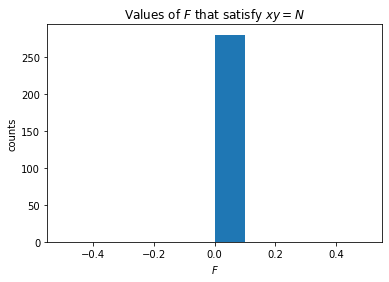

In [72]:
# !pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist([sample.value for sample in filtered_res])
plt.xlabel("$F$")
plt.ylabel("counts")
plt.title("Values of $F$ that satisfy $xy = N$")
plt.show()

Well obviously everything is lying on $F(x, y) = 0$ because we've already filtered out all of the states that do not satisfy $F(x, y) = 0$! How about we plot the *unfiltered* output.

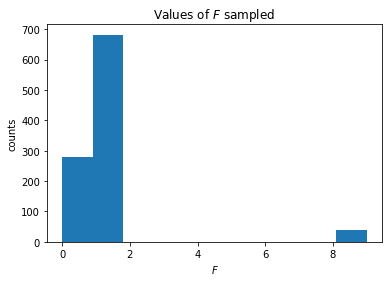

In [73]:
plt.hist([sample.value for sample in res])
plt.xlabel("$F$")
plt.ylabel("counts")
plt.title("Values of $F$ sampled")
plt.show()

One thing to know is that qubovert's implementation of simulated annealing for QUBOs is *faster* than for PUBOs. This is because of the way that it calculates the change in energy from flipping a bit. So sometimes, depending on the problem, it is actually faster to convert your PUBO to a QUBO, run simulated annealing, and then convert the result back. We show how to do that here.

In [74]:
qubo_F = F.to_qubo()
res = qv.sim.anneal_qubo(qubo_F, num_anneals=1000)
print(res.best)

  state: {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}
  value: 0
   spin: False


Now our variables are labeled with integer variables, so how do we go back to the original variables?

In [75]:
F_solution = F.convert_solution(res.best.state)

print("F_solution =", F_solution)
print("x =", x.value(F_solution))
print("y =", y.value(F_solution))
print("F(x, y) =", F.value(F_solution))

F_solution = {'y0': 1, 'x0': 1, 'y1': 0, 'y2': 0, 'x1': 0, 'x2': 0}
x = 3
y = 3
F(x, y) = 0


If we want to convert *all* of the states in the anneal result, we can use the `convert_states` method.

In [76]:
converted_res = res.convert_states(F.convert_solution)
print(converted_res.best)

  state: {'y0': 1, 'x0': 1, 'y1': 0, 'y2': 0, 'x1': 0, 'x2': 0}
  value: 0
   spin: False


We could then filter if we wanted to.

In [77]:
print(len(converted_res))
filtered_res = converted_res.filter_states(lambda state: x.value(state) * y.value(state) == N)
print(len(filtered_res))

1000
59


It's not surprising that less of the solutions satisfy $xy=N$ because the QUBO form has a much larger solution space because of the extra variables! So even if it is *faster* to run `anneal_qubo`, it is not always *better*. This is why `anneal_pubo` is so important.

The `anneal_qubo` and `anneal_pubo` functions actually just convert the QUBO and PUBO to a QUSO and PUSO respectively, solve those with `anneal_quso` and `anneal_puso`, and then convert the solution back to boolean form. So if you have a spin function, then don't convert it to boolean form before solving it with simulated annealing!

For completeness, let's show the many ways we could find the groundstate of $F$ if we were to convert it to a PUSO. First let's convert it to a `PUSOMatrix` via the `to_puso` method solve it with `anneal_puso`, convert the solutions to boolean with the `.to_boolean` method, and then convert the solutions back to be labeled by the original labels with the `F.convert_solution` method. This is one major theme of qubovert; whenever any of the `.to_qubo`, `.to_quso`, `.to_pubo`, or `.to_puso` methods are used, they should always be acompanied by the `.convert_solution` method!

In [78]:
puso_F = F.to_puso()
puso_res = qv.sim.anneal_puso(puso_F, num_anneals=1000)
F_res = puso_res.to_boolean()
converted_res = F_res.convert_states(F.convert_solution)
filtered_res = converted_res.filter_states(lambda state: x.value(state) * y.value(state) == N)
print(filtered_res.best)
print(len(filtered_res))

  state: {'y0': 1, 'x0': 1, 'y1': 0, 'y2': 0, 'x1': 0, 'x2': 0}
  value: 0
   spin: False
281


Next we'll explicitly convert `F` to be a PUSO, solve it with `anneal_puso`, and then convert the results to boolean via the `.to_boolean` method. By the way, there is also a `.to_spin` method that would take boolean results to spin results, but of course we don't need that here.

In [79]:
puso_F = qv.utils.pubo_to_puso(F)
puso_res = qv.sim.anneal_puso(puso_F, num_anneals=1000)
F_res = puso_res.to_boolean()
filtered_res = F_res.filter_states(lambda state: x.value(state) * y.value(state) == N)
print(filtered_res.best)
print(len(filtered_res))

  state: {'y0': 1, 'x0': 1, 'y1': 0, 'y2': 0, 'x1': 0, 'x2': 0}
  value: 0
   spin: False
281


Finally, we'll convert `F` to a QUSO via the `.to_quso` method, solve it with `anneal_quso`, and then convert the solutions back.

In [80]:
quso_F = F.to_quso()
res = qv.sim.anneal_quso(quso_F, num_anneals=1000)
qubo_res = res.to_boolean()
converted_res = qubo_res.convert_states(F.convert_solution)
filtered_res = converted_res.filter_states(lambda state: x.value(state) * y.value(state) == N)
print(filtered_res.best)
print(len(filtered_res))

  state: {'y0': 1, 'x0': 1, 'y1': 0, 'y2': 0, 'x1': 0, 'x2': 0}
  value: 0
   spin: False
67


So there's our quick overview of the `qubovert.sim` library. We'll discuss it a little bit more later, and again see [this notebook](https://github.com/jtiosue/qubovert/blob/master/notebook_examples/Annealing.ipynb) for a discussion on advanced annealing. One theme that we've come across many times now is that *whenever any of the `.to_qubo`, `.to_quso`, `.to_pubo`, or `.to_puso` methods are used, they should always be acompanied by the `.convert_solution` method!*

## Motivation #6: boolean logic

This wasn't exactly an initial motivation for qubovert, but it came up as a prerequisite to dealing with constraints with the `qubovert.PCBO` object. So we'll take a very quick detour to talk about the `qubovert.sat` library that we'll be useful to know about for moving on the the next section about [constraints and ancillas](#Motivation-#7:-constraints-and-ancillas).

The `qubovert.sat` library is for managing pseudo-boolean functions for boolean logic. Consider the AND gate on variables $v_1, \dots, v_n$:

$$\text{AND}:\{0, 1 \} \times \dots \times \{0, 1 \}\to \{0, 1 \} \qquad s.t. \quad \text{AND}(v_1, \dots, v_n) = \begin{cases}
1&\text{if }\forall i: v_i = 1\\
0&\text{else}
\end{cases}$$

Indeed the AND function is a PUBO. Let's start off with four boolean variables $w, x, y, z$. We see that AND$(x, y) = xy$.

In [81]:
from itertools import product

AND = qv.sat.AND('x', 'y')
print(AND)
print()

for i, j in product((0, 1), repeat=2):
    assignment = {'x': i, 'y': j}
    print(assignment, " --> ", AND.value(assignment))

{('y', 'x'): 1}

{'x': 0, 'y': 0}  -->  0
{'x': 0, 'y': 1}  -->  0
{'x': 1, 'y': 0}  -->  0
{'x': 1, 'y': 1}  -->  1


Similarly, AND$(w, x, y, z) = wxyz$.

In [82]:
AND = qv.sat.AND('w', 'x', 'y', 'z')
print(AND)
print()

for i, j, k, l in product((0, 1), repeat=4):
    assignment = {'w': i, 'x': j, 'y': k, 'z': l}
    print(assignment, " --> ", AND.value(assignment))

{('y', 'x', 'w', 'z'): 1}

{'w': 0, 'x': 0, 'y': 0, 'z': 0}  -->  0
{'w': 0, 'x': 0, 'y': 0, 'z': 1}  -->  0
{'w': 0, 'x': 0, 'y': 1, 'z': 0}  -->  0
{'w': 0, 'x': 0, 'y': 1, 'z': 1}  -->  0
{'w': 0, 'x': 1, 'y': 0, 'z': 0}  -->  0
{'w': 0, 'x': 1, 'y': 0, 'z': 1}  -->  0
{'w': 0, 'x': 1, 'y': 1, 'z': 0}  -->  0
{'w': 0, 'x': 1, 'y': 1, 'z': 1}  -->  0
{'w': 1, 'x': 0, 'y': 0, 'z': 0}  -->  0
{'w': 1, 'x': 0, 'y': 0, 'z': 1}  -->  0
{'w': 1, 'x': 0, 'y': 1, 'z': 0}  -->  0
{'w': 1, 'x': 0, 'y': 1, 'z': 1}  -->  0
{'w': 1, 'x': 1, 'y': 0, 'z': 0}  -->  0
{'w': 1, 'x': 1, 'y': 0, 'z': 1}  -->  0
{'w': 1, 'x': 1, 'y': 1, 'z': 0}  -->  0
{'w': 1, 'x': 1, 'y': 1, 'z': 1}  -->  1


Notice that the `qubovert.sat.AND` function took in a bunch of boolean variable labels, and outputted a PUBO whose value was the AND of the variables. But more generally, the AND function can take in boolean *expressions*. For example, consider the following logical expression,

$$C: (x, y, z) \to (\overline{\bar x \land y \land \overline{x \land z}}) \lor (\bar z \land y).$$

In [83]:
C = qv.sat.OR(
    qv.sat.NAND(
        qv.sat.NOT('x'), 
        'y', qv.sat.
        NAND('x', 'z')
    ), qv.sat.AND(
        qv.sat.NOT('z'), 
        'y'
    )
)

print("Forumla")
print("C(x, y, z) =", C)
print()

print("Values")
for i, j, k in product((0, 1), repeat=3):
    assignment = {'x': i, 'y': j, 'z': k}
    print(assignment, ' --> ', 'C =', C.value(assignment))

Forumla
C(x, y, z) = {(): 1, ('y', 'x', 'z'): 1, ('y', 'z'): -1}

Values
{'x': 0, 'y': 0, 'z': 0}  -->  C = 1
{'x': 0, 'y': 0, 'z': 1}  -->  C = 1
{'x': 0, 'y': 1, 'z': 0}  -->  C = 1
{'x': 0, 'y': 1, 'z': 1}  -->  C = 0
{'x': 1, 'y': 0, 'z': 0}  -->  C = 1
{'x': 1, 'y': 0, 'z': 1}  -->  C = 1
{'x': 1, 'y': 1, 'z': 0}  -->  C = 1
{'x': 1, 'y': 1, 'z': 1}  -->  C = 1


We can see that qubovert automatically simplifies the expression, and that the formula for $C$ is simply

$$C = 1 + xyz - yz.$$

In other words,

$$C: (x, y, z) \to \overline{ \bar x \land y \land z}.$$

I won't go over any more of the functions, but you can see them all here. Again, they have good docstrings so just use `help(function_name)` to learn about them.

In [84]:
qv.sat.__all__

('BUFFER', 'NOT', 'AND', 'NAND', 'OR', 'NOR', 'XOR', 'XNOR')

Most of them accept any number of arguments.

In [85]:
print(qv.sat.AND())
print(qv.sat.AND('x'))
print(qv.sat.AND('x', 'y'))
print(qv.sat.AND('x', 'y', 'z'))

{(): 1}
{('x',): 1}
{('y', 'x'): 1}
{('y', 'x', 'z'): 1}


**One very important note!** SAT functions take labels and expressions, so it will consider a 0 or a 1 as a label not an expression! Let me explain. If I wanted to do the OR of $x$ and $y$, there are two ways that I can do that. The first is to explictly send in the labels `'x'` and `'y'`.

In [86]:
qv.sat.OR('x', 'y')

{('x',): 1, ('y', 'x'): -1, ('y',): 1}

The second is to create the PUBOs representing the variables $x$ and $y$.

In [87]:
x = {('x',): 1}
y = {('y',): 1}

qv.sat.OR(x, y)

{('x',): 1, ('y', 'x'): -1, ('y',): 1}

The reason we would want to the latter is so that we can send in expressions rather than just variables.

In [88]:
ex = qv.sat.AND('w', 'z')
print(ex)
print(qv.sat.OR('x', 'y', ex))

{('w', 'z'): 1}
{('x',): 1, ('y', 'x'): -1, ('y',): 1, ('x', 'w', 'z'): -1, ('y', 'x', 'w', 'z'): 1, ('y', 'w', 'z'): -1, ('w', 'z'): 1}


But qubovert allows any hashable object to be a label of a variable. So for example we can AND two variables $x_0$ and $x_1$ that we label in qubovert simply by the integers 0 and 1.

In [89]:
print(qv.sat.AND(0, 1))
print(qv.sat.AND({(0,): 1}, {(1,): 1}))

{(0, 1): 1}
{(0, 1): 1}


This may be unexpected behavior if you are not aware. $x \land y$ evaluates to 0 if either or both $x = 0$ or $y = 0$. Consider the following cell. You may naively think that these should output the same thing. But they don't! That's because the arguments of the SAT functions are *always treated as variable labels!*

In [90]:
print(qv.sat.AND('x', 'y').value({'x': 0, 'y': 1}))
print(qv.sat.AND(0, 1))

0
{(0, 1): 1}


If you want to compute a SAT expression of a bunch of variables and values, then consider using `subvalue`. In the following example, we'll take the AND of $w, x, y$, and then replace $w$ with the value 1 but leave $x$ and $y$ as variables. The resulting expression will just be the AND of $x$ and $y$.

In [91]:
ex = qv.sat.AND('w', 'x', 'y')
print(ex)
print(ex.subvalue({'w': 1}))

{('y', 'x', 'w'): 1}
{('y', 'x'): 1}


In the following example, we'll take the AND of $w, x, y$, and then replace $w$ with the value 0 but leave $x$ and $y$ as variables. The resulting expression will just be the PUBO representing 0 because there is no assignment of $x$ and $y$ to make AND$(w, x, y) = 1$ when $w = 0$.

In [92]:
ex = qv.sat.AND('w', 'x', 'y')
print(ex)
print(ex.subvalue({'w': 0}))

{('y', 'x', 'w'): 1}
{}


Indeed we can substitute $x$ and $y$ with values and we'll always get zero.

In [93]:
ex = qv.sat.AND('w', 'x', 'y').subvalue({'w': 0})

for i, j in product((0, 1), repeat=2):
    assignment = {'x': i, 'y': j}
    print(assignment, ' --> ', ex.value(assignment))

{'x': 0, 'y': 0}  -->  0
{'x': 0, 'y': 1}  -->  0
{'x': 1, 'y': 0}  -->  0
{'x': 1, 'y': 1}  -->  0


Okay that's our brief aside on boolean logic with qubovert! This will be necessary to know for our next section on adding constraints.

## Motivation #7: constraints and ancillas

The next motivation for making qubovert was to implement constraints. Oftentimes constraints introduce ancilla variables, and in my experience keeping track of these ancillas can cause a lot of bugs and ugly code. This section will serve as a brief introduction to Polynomial Constrained Boolean Optimization (PCBO) problems, and as usual most of what I show here has analagous usage for Polynomial Constrained Spin Optimization (PCSO) problems (except for the boolean logic). I will not go into very much detail for now; at the end of this section I will list some of the remaining sections in this notebook that are particularly useful for working with PCBOs and PCSOs. With all that being said, let's get started.

Let's say that we have a PUBO that we want to minimize

$$P(x) = -\sum_{i=0}^{4}x_ix_{i+1}.$$

In [94]:
xs = [qv.PUBO({(i,): 1}) for i in range(6)]
P = -sum(xs[i] * xs[i+1] for i in range(5))
print(P.pretty_str())

-x(0) x(1) - x(1) x(2) - x(2) x(3) - x(3) x(4) - x(4) x(5)


In addition, suppose that we want to minimize $P$ subject to two constraints;
1. the first constraint will be that there are never three 1's in a row, ie $$C_1(x) := \sum_{i=0}^{3}x_i x_{i+1}x_{i+2} = 0;$$
2. the second constraint will be that $$C_2(x) := \sum_{i=0}^5 x_i - 3 \leq 0.$$

Let's create $C_1$ and $C_2$.

In [95]:
C1 = sum(xs[i] * xs[i+1] * xs[i+2] for i in range(4))
C2 = sum(xs) - 3

print("C1 =", C1.pretty_str())
print("C2 =", C2.pretty_str())

C1 = x(0) x(1) x(2) + x(1) x(2) x(3) + x(2) x(3) x(4) + x(3) x(4) x(5)
C2 = x(0) + x(1) + x(2) + x(3) + x(4) + x(5) - 3


Our method to enforce these constraints will be to add penalties weighted by Lagrange multipliers to $P$. Suppose there existed functions $f_1 : \{0, 1 \}^6 \to \mathbb R$ and $f_2: \{0, 1 \}^6 \to \mathbb R$ such that

$$f_1(x) \begin{cases}=0&\text{if } C_1(x) = 0\\ >0&\text{else}\end{cases} \qquad f_2(x) \begin{cases}=0&\text{if } C_2(x) \leq 0\\ >0&\text{else}\end{cases}$$

Then we can see that the solution to our constrained problem is the solution to the following unconstrained problem:

$$\min_{x} P(x) \text{ s.t. } \left\{C_1(x) =0, C_2(x) \leq 0\right\} = \lim_{\lambda_1, \lambda_2 \to \infty}\min_x \left(P(x) + \lambda_1 f_1(x) + \lambda_2 f_2(x) \right).$$

Now we just need to find a satisfying $f_1$ and $f_2$. Well notice that $f_1(x) = C_1(x)$ satisfies the criteria. Okay great, now what about $f_2$? This one is a little more difficult, but let me just get straight to the point. Consider that we introduce ancilla boolean variables $a_0$ and $a_1$ and we set 

$$f_2(x, a) = \left(C_2(x) + a_0 + 2a_1\right)^2.$$

Note that $\min_x C_2(x) = -3$. Thus for every $x$ that satisfies $C_2(x) \leq 0$, there exists a value of $a_0$ and $a_1$ such that $f_2(x, a) = 0$. Now our unconstrained problem has two extra variables and needs to be modified accordingly as

$$\min_{x} P(x) \text{ s.t. } \left\{C_1(x) =0, C_2(x) \leq 0\right\} = \lim_{\lambda_1, \lambda_2 \to \infty}\min_{x, a} \left(P(x) + \lambda_1 f_1(x) + \lambda_2 f_2(x, a) \right).$$

In general, setting the Lagrange multipliers $\lambda_1$ and $\lambda_2$ is a relatively hard task, and the values that give the best performance depends on the solver that you are using. Too small and they will not adequetely enforce the constraints; too large and they make the optimization landscape very hard to traverse and thus it is very hard to find the true minimum. For simiplicity for this example, let's just set them both equal to 10.

In [96]:
lam1 = lam2 = 10

We can create the unconstrained PUBO $U$ that solves our PUBO as follows. The reason that I name $a_0, a_1$ as `'__a0', '__a1'` will become clear in a few cells.

In [97]:
a0, a1 = qv.PUBO.create_var('__a0'), qv.PUBO.create_var('__a1')
U = P + lam1 * C1 + lam2 * (C2 + a0 + 2*a1)**2

Let's solve $U$ bruteforce and see if all of the constraints are satisfied.

In [98]:
sol = U.solve_bruteforce()
print("C1 satisfied?", C1.value(sol) == 0)
print("C2 satisfied?", C2.value(sol) <= 0)

C1 satisfied? True
C2 satisfied? True


You can imagine that as you start to introduce more and more constraints (especially inequality constraints since they often introduce ancilla variables) that we'd like a nice automated way to keep track of all of the ancilla variables and all of the constraints so that we can easily see if the constraints are satisfied. That's where the `PCBO` object comes in. Let's look at the MRO.

In [99]:
qv.PCBO.mro()

[qubovert._pcbo.PCBO,
 qubovert._pubo.PUBO,
 qubovert.utils._bo_parentclass.BO,
 qubovert.utils._conversions.Conversions,
 qubovert.utils._pubomatrix.PUBOMatrix,
 qubovert.utils._dict_arithmetic.DictArithmetic,
 dict,
 object]

It inherits directly from the `PUBO` class. Let me convert `P` (which is currently a `PUBO` object) to a `PCBO` object. Then let's add our constraints that $C_1(x) = 0$ and $C_2(x) \leq 0$.

In [100]:
P_pcbo = qv.PCBO(P)
P_pcbo.add_constraint_eq_zero(C1, lam=lam1)
P_pcbo.add_constraint_le_zero(C2, lam=lam2)
print(P_pcbo)

{(0, 1): 19, (1, 2): 19, (2, 3): 19, (3, 4): 19, (4, 5): 19, (0, 1, 2): 10, (1, 2, 3): 10, (2, 3, 4): 10, (3, 4, 5): 10, (0,): -50, (0, 2): 20, (0, 3): 20, (0, 4): 20, (0, 5): 20, ('__a0', 0): 20, ('__a1', 0): 40, (1,): -50, (1, 3): 20, (1, 4): 20, (1, 5): 20, ('__a0', 1): 20, ('__a1', 1): 40, (2,): -50, (2, 4): 20, (2, 5): 20, ('__a0', 2): 20, ('__a1', 2): 40, (3,): -50, (3, 5): 20, ('__a0', 3): 20, ('__a1', 3): 40, (4,): -50, ('__a0', 4): 20, ('__a1', 4): 40, (5,): -50, ('__a0', 5): 20, ('__a1', 5): 40, (): 90, ('__a0',): -50, ('__a1',): -80, ('__a1', '__a0'): 40}


Notice that our `PCBO` object was automatically updated. You can see that new variables were added.

In [101]:
P_pcbo.variables

{0, 1, 2, 3, 4, 5, '__a0', '__a1'}

qubovert automatically adds the penalties to the function, and it labels the ancillas with the prefix `'__a'`. Let's check that our new `PCBO` is doing exactly what we doing before with $U$.

In [102]:
P_pcbo == U

True

So what's really nice about this object is that it keeps track of ancillas and will automatically add the penalty terms to the function. What is also very nice is that it keeps track of all of the constraints.

In [103]:
P_pcbo.constraints

{'eq': [{(0, 1, 2): 1, (1, 2, 3): 1, (2, 3, 4): 1, (3, 4, 5): 1}],
 'le': [{(0,): 1, (1,): 1, (2,): 1, (3,): 1, (4,): 1, (5,): 1, (): -3}]}

Notice that's $C_1$ and $C_2$! Because it keeps track of all of the constraints, it can tell us if a proposed solution satisfies all of the constraints via the `.is_solution_valid` method.

In [104]:
sol = P_pcbo.solve_bruteforce()
print(sol)
print(P_pcbo.is_solution_valid(sol))

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, '__a0': 1, '__a1': 0}
True


It may be kind of annoying to your that our solution still contains ancilla information even though we don't necessarily care about those ancillas. To remove the ancillas from the solution, we can do

In [105]:
P_pcbo.remove_ancilla_from_solution(sol)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1}

Now what if we want to solve this problem with qubovert's PUBO simulated annealer? Well let's do that here.

In [106]:
res = qv.sim.anneal_pubo(P_pcbo, num_anneals=5)
no_ancilla = res.convert_states(P_pcbo.remove_ancilla_from_solution)
satisfy_constraints = no_ancilla.filter_states(P_pcbo.is_solution_valid)
print("solutions that satisfy all of the constraints:\n")
print(satisfy_constraints)

solutions that satisfy all of the constraints:

AnnealResults

  state: {0: 1, 1: 1, 2: 0, 3: 0, 4: 1, 5: 0}
  value: -1
   spin: False

  state: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1}
  value: 0
   spin: False

  state: {0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0}
  value: -1
   spin: False

  state: {0: 0, 1: 1, 2: 0, 3: 0, 4: 1, 5: 1}
  value: -1
   spin: False

  state: {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 1}
  value: -1
   spin: False


What if we want to solve it with qubovert's QUSO simulated annealer?

In [107]:
res = qv.sim.anneal_quso(P_pcbo.to_quso(), num_anneals=5)
converted_res = res.convert_states(P_pcbo.convert_solution)
no_ancilla = converted_res.convert_states(P_pcbo.remove_ancilla_from_solution)
satisfy_constraints = no_ancilla.filter_states(P_pcbo.is_solution_valid)
print("solutions that satisfy all of the constraints:\n")
print(satisfy_constraints)

solutions that satisfy all of the constraints:

AnnealResults

  state: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1}
  value: 0
   spin: True

  state: {0: 1, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0}
  value: -1
   spin: True

  state: {0: 1, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1}
  value: -1
   spin: True

  state: {0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0}
  value: -1
   spin: True

  state: {0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0}
  value: -1
   spin: True


As always, since we used a `.to_` method (ie `.to_quso`), we *must* use the `.convert_solution` method.

Let's do one more example. This time instead of starting off with a PUBO and then converting to a PCBO, let's start right away with PCBO variables. To create a `PCBO` variable, you could do exactly what we've been doing with all the other objects; 

    x = qv.PCBO({('x',): 1})

or similarly,

    x = qv.PCBO.create_var('x')
    
But given how often we do this, qubovert has a function for that, namely `qv.boolean_var('x')` which is exactly the same as `qv.PCBO.create_var`, including setting the name attribute.

In [108]:
x0 = qv.PCBO({('x',): 1})
x1 = qv.PCBO.create_var('x')
x2 = qv.boolean_var('x')
print(type(x0) == type(x1) == type(x2))
print(x0 == x1 == x2)
print(x0.name, x1.name, x2.name)

True
True
None x x


But you could manually set the name for `x0` if you wanted to.

In [109]:
x0.name = 'x'
print(x0.name)

x


By the way, an analogous function exists `qv.spin_var` that creates a PCSO spin variable instead of a PCBO boolean variable. Anyways, let's create a list of 5 boolean variables.

In [110]:
xs = [qv.boolean_var('x%d' % i) for i in range(5)]

Suppose that we want to minimize $-\sum_i x_i$ subject to the constraints that

$$x_0 \oplus x_1 = x_3, \quad 3x_0+2x_1+4x_3>3, \quad (x_2 \lor \bar x_4) \land (\bar x_1 \lor x_3) = 1.$$

As we did before, we'll arbitrarily set the Lagrange multipliers for each of these constraints; we'll just set all of them to 10. This is quite easy to do. Then we'll get a bunch of info.

In [111]:
pcbo = -sum(xs)
pcbo.add_constraint_eq_XOR(
    xs[3], xs[0], xs[1],
    lam=10
).add_constraint_gt_zero(
    3*xs[0] + 2*xs[1] + 4*xs[3] - 3,
    lam=10
).add_constraint_AND(
    qv.sat.OR(xs[2], qv.sat.NOT(xs[4])),
    qv.sat.OR(qv.sat.NOT(xs[1]), xs[3]),
    lam=10
)

print("Number of variables         : ", pcbo.num_binary_variables)
print("Number of ancilla variables : ", pcbo.num_ancillas)
print("Degree                      : ", pcbo.degree)
print("Variables                   : ", pcbo.variables)
print("Number of terms             : ", pcbo.num_terms)

Number of variables         :  8
Number of ancilla variables :  3
Degree                      :  4
Variables                   :  {'x0', 'x2', 'x4', 'x3', '__a0', '__a1', 'x1', '__a2'}
Number of terms             :  30


What I think is cool about this is that creating the PCBO with qubovert is as easy as it is (*or easier*) to write it down in math. We don't even have to worry about any of the ancillas, we can literally just write down our function to minimize and then tack on the constraints. In addition, since the constraints themselves don't depend on ancillas we can use the `.is_solution_valid` method without specifying ancilla values. As an example, let's just create a random assignment and see if it satisfies.

In [112]:
assignment = {'x0': 0, 'x1': 0, 'x2': 1, 'x3': 0, 'x4': 1}
print(pcbo.is_solution_valid(assignment))

False


What if we want to figure out which constraint it violates? Well we can look at the `constraints` dictionary.

In [113]:
constraints = pcbo.constraints
print(constraints)

{'eq': [{('x0',): 1, ('x0', 'x1'): -2, ('x1',): 1, ('x3',): -1}, {('x2', 'x4', 'x1'): 1, ('x2', 'x4'): -1, ('x2', 'x4', 'x3', 'x1'): -1, ('x4', 'x1'): -1, ('x4',): 1, ('x4', 'x3', 'x1'): 1, ('x1',): 1, ('x3', 'x1'): -1}], 'gt': [{('x0',): 3, ('x1',): 2, ('x3',): 4, (): -3}]}


First let's check the equality constraints.

In [114]:
for c in constraints['eq']:
    if c.value(assignment) != 0:
        print("Not satisfied:", c)

Looks like all of the equality constraints are satisfied. So it must be the $>$ constraint.

In [115]:
for c in constraints['gt']:
    if c.value(assignment) != 0:
        print("Not satisfied:", c)

Not satisfied: {('x0',): 3, ('x1',): 2, ('x3',): 4, (): -3}


Finally, let's just quickly convert this to a QUBO, solve it with D-Wave's simulated annealer, convert it back, and then check if the constraints are satisfied. As always, since we used a `.to_` method (ie `.to_qubo`), we *must* use the `.convert_solution` method.

In [116]:
from neal import SimulatedAnnealingSampler

qubo = pcbo.to_qubo()
res = SimulatedAnnealingSampler().sample_qubo(qubo.Q, num_reads=10)
best_solution = res.first.sample

converted_solution = pcbo.convert_solution(best_solution)
print("Number of variables         : ", pcbo.num_binary_variables)
print("Number of variables in qubo : ", qubo.num_binary_variables)
print("Solution                    : ", converted_solution)
print("Solution without ancilla    : ", pcbo.remove_ancilla_from_solution(converted_solution))
print("Are constraints satisfied?  : ", pcbo.is_solution_valid(converted_solution))
print("Value                       : ", pcbo.value(converted_solution))

Number of variables         :  8
Number of variables in qubo :  11
Solution                    :  {'x0': 0, 'x1': 1, 'x2': 1, 'x3': 1, 'x4': 1, '__a0': 0, '__a1': 1, '__a2': 0}
Solution without ancilla    :  {'x0': 0, 'x1': 1, 'x2': 1, 'x3': 1, 'x4': 1}
Are constraints satisfied?  :  True
Value                       :  -4


So that's my brief introduction to constraints with qubovert. I think it's pretty cool because we have a bunch of constraints going on, a bunch of ancillas being added for those constraints, and a bunch of ancillas being added when reducing the degree and making the problem into a QUBO. But we can pretty much forget about ancillas altogether because qubovert does all of the work for us internally. The `PCBO` and `PCSO` objects are really the culmination of a lot of work in qubovert; you can see this by looking at their MRO and how they build on everything we've talked about so far.

I didn't mention all of the available constraint methods; please see the documentation. Please see the remainder of this notebook for more info, in particular the following sections:

- [Tip #1: using symbols](#Tip-#1:-using-symbols), where I discuss among other things how to use symbols as Lagrange multipliers for constraints;
- [Tip #2: keeping functions and constraints separate with PCBOs and PCSOs](#Tip-#2:-keeping-functions-and-constraints-separate-with-PCBOs-and-PCSOs), where I discuss a way to deal with constraints that is slightly different than the way I show in this section;
- [Tip #3: bounds as a constraint argument](#Tip-#3:-bounds-as-a-constraint-argument), where I discuss when/how to supply the `bounds` keyword when calling the constraint methods;
- [Tip #4: log_trick as a constraint argument](#Tip-#4:-log_trick-as-a-constraint-argument), where I discuss when/how to supply the `log_trick` keyword when calling the constraint methods;
- [Tip #5: special constraints](#Tip-#5:-special-constraints), where I discuss how qubovert recognizes certain special constraint forms;
- [Tip #8: bruteforce solver options](#Tip-#8:-bruteforce-solver-options), where I disucss how to use qubovert bruteforce solver functionality when using constraints.
- [Tip #13: using constraints without adding penalties](#Tip-#13:-using-constraints-without-adding-penalties), where I discuss how to use constraints with PCBOs and PCSOs if you don't want to automatically add the penalty terms to the function.

## Motivation #8: common binary problems

The final motivation for qubovert that I'll mention was actually historically the first motivation. One of the goals of qubovert is to have a bunch of commonly used problems implemented. This is what the `problems` library is for.

In [117]:
qv.problems.__all__

('BILP',
 'JobSequencing',
 'SetCover',
 'VertexCover',
 'NumberPartitioning',
 'GraphPartitioning',
 'AlternatingSectorsChain')

At the moment, there are not too many there, but hopefully there will be more soon. Presently, the `problems` library is split into two subcategories.

In [118]:
print("Benchmarking     :", qv.problems.benchmarking.__all__)
print("NP-Hard problems :", qv.problems.np.__all__)

Benchmarking     : ('AlternatingSectorsChain',)
NP-Hard problems : ('BILP', 'JobSequencing', 'SetCover', 'VertexCover', 'NumberPartitioning', 'GraphPartitioning')


I won't go into detail about all of these, but the general way to use all of these is the same, and please use the `help` function as all of the docstrings are very descriptive. If you look, for example, at one of their MRO.

In [119]:
qv.problems.SetCover.mro()

[qubovert.problems.np.covering._set_cover.SetCover,
 qubovert.problems._problem_parentclass.Problem,
 qubovert.utils._conversions.Conversions,
 object]

In [120]:
qv.problems.BILP.mro()

[qubovert.problems.np.bilp._bilp.BILP,
 qubovert.problems._problem_parentclass.Problem,
 qubovert.utils._conversions.Conversions,
 object]

We see that they all inherit from the `qv.problems.Problem` parent class. The basic usage of these classes is to set up the problem, use their `.to_qubo` and `.to_quso` methods to create QUBOs and QUSOs that encode the problem, solve the QUBO or QUSO however you'd like, and then convert the solution back to a meaningful result. Let's just do an example with Graph Partitioning. Rather than typing out exactly what Graph Partitioning is, let me just print out the class docstring since I already wrote it!

In [121]:
print(qv.problems.GraphPartitioning.__doc__)

GraphPartitioning.

    Class to manage converting (Weighted) Graph Partitioning to and from its
    QUBO and QUSO formluations. Based on the paper "Ising formulations of many
    NP problems", hereforth designated [Lucas].

    The goal of the Graph Partitioning problem is to partition the verticies
    of a graph into two equal subsets such that the number of edges (or the
    total weight of the edges) connecting the two subsets is minimized.

    GraphPartitioning inherits some methods and attributes from the Problem
    class. See ``help(qubovert.problems.Problem)``.

    Example
    -------
    >>> from qubovert.problems import GraphPartitioning
    >>> from any_module import qubo_solver
    >>> # or you can use my bruteforce solver...
    >>> # from qubovert.utils import solve_qubo_bruteforce as qubo_solver
    >>> edges = {("a", "b"), ("a", "c"), ("c", "d"),
                 ("b", "c"), ("e", "f"), ("d", "e")}
    >>> problem = GraphPartitioning(edges)
    >>> Q = problem.to_qu

So let's follow the example and do something similar. Let's consider a random fully-connected weighted graph on 6 vertices. We'll represent this graph by a dictionary where the keys are edges and the values are the corresponding weights.

In [122]:
import random

graph = {
    (i, j): random.random()
    for i in range(6) for j in range(i+1, 6)
}
problem = qv.problems.GraphPartitioning(graph)

We can look at some properties of the graph, for example the degree of the graph (the maximum number of edges going into any node). Since our graph is fully-connected with 6 nodes, this should be 5.

In [123]:
problem.degree

5

We can also look at the number of variables that will be in the resulting QUBO or QUSO.

In [124]:
problem.num_binary_variables

6

Since there are 6, this means that there are no ancilla because we have one variable per node. Okay let's go about solving this problem with qubovert's bruteforce solver. Let's show three ways to do this.

**First way.**

In [125]:
solution = problem.solve_bruteforce()
print(solution)
print("is solution valid :", problem.is_solution_valid(solution))

({1, 2, 5}, {0, 3, 4})
is solution valid : True


**Second way.**

In [126]:
qubo = problem.to_qubo()
qubo_solution = qubo.solve_bruteforce()
print("qubo solution     :", qubo_solution)
print("qubo value        :", qubo.value(qubo_solution))
problem_solution = problem.convert_solution(qubo_solution)
print("Solution          :", problem_solution)
print("is solution valid :", problem.is_solution_valid(problem_solution))

qubo solution     : {0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 1}
qubo value        : 2.9427440792140445
Solution          : ({1, 2, 5}, {0, 3, 4})
is solution valid : True


**Third way**.

In [127]:
qubo = problem.to_qubo()
val, qubo_solution = qv.utils.solve_qubo_bruteforce(qubo)
print("qubo solution :", qubo_solution)
print("qubo value    :", val)
problem_solution = problem.convert_solution(qubo_solution)
print("Solution      :", problem_solution)
print("is solution valid :", problem.is_solution_valid(problem_solution))

qubo solution : {0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 1}
qubo value    : 2.9427440792140445
Solution      : ({1, 2, 5}, {0, 3, 4})
is solution valid : True


Of course we could have used the `.to_quso` method instead and solved the QUSO. Notice again the reoccuring theme that the `.to_qubo` method returns a `QUBOMatrix` and that *the `.to_` methods should always be accompanied by the `.convert_solution` method*. For the Graph Partitioning problem, the `.convert_solution` method takes the solution to the QUBO or QUSO and converts it to something meaninful, namely a tuple of sets where each set represents a partition of nodes. The `.is_solution_valid` method checks if the partition sizes are equal. The value of the QUBO for a particular pair of partitions is the total weight of edges passing through the partition plus a penalty for if the two partitions are not the same size. So we can see that the following are equal.

In [128]:
print(sum(
    v for k, v in graph.items() if (
        k[0] in problem_solution[0] and k[1] in problem_solution[1]
    ) or (
        k[0] in problem_solution[1] and k[1] in problem_solution[0]
    )
))

2.942744079214049


By the way if you look at the docstring for the `.to_quso` method you'll see that for both the `.to_qubo` and `.to_quso` methods you can adjust the Lagrange multipliers that they use. But if you don't supply any then they are chosen by default.

The basic process for all of the problems is the same. We'll do one more quick example. Consider Set Cover.

In [129]:
print(qv.problems.SetCover.__doc__)

SetCover.

    Class to manage converting (Weighted) Set Cover to and from its QUBO and
    QUSO formluations. Based on the paper "Ising formulations of many
    NP problems", hereforth designated as [Lucas].

    The goal of the SetCover problem is to find the smallest number of subsets
    of U in V such that union over the elements equals U. The goal of the
    Weghted SetCover problem is to find the smallest weight of subsets of U
    in V such that union over the elements equals U, where each element in V
    has an associated weight.

    This class inherits some methods and attributes from the
    ``qubovert.problems.Problem`` class.

    Example
    -------
    >>> from qubovert.problems import SetCover
    >>> from any_module import qubo_solver
    >>> # or you can use my bruteforce solver...
    >>> # from qubovert.utils import solve_qubo_bruteforce as qubo_solver
    >>> U = {"a", "b", "c", "d"}
    >>> V = [{"a", "b"}, {"a", "c"}, {"c", "d"}]
    >>> problem = SetCover(U, V

Let's consider we want to cover the set $\{0, 1, \dots, 7 \}$ with the 5 smaller subsets $\{0, 5, 6 \}, \{0, 1, 4, 7 \}, \{2, 6, 7 \}, \{1, 4, 5, 6, 7 \}$.

In [130]:
U = set(range(8))
V = [{0, 5, 6}, {0, 1, 4, 7}, {2, 6, 7}, {1, 4, 5, 6, 7}]
problem = qv.problems.SetCover(U, V)

First let's make sure that the problem is actually solvable. Thus we want to know if $U$ is coverable by subsets in $V$.

In [131]:
problem.is_coverable()

False

We see it's not coverable because there is never a $3$ in any of the subsets! Okay let's add another subset $\{3\}$ to the mix.

In [132]:
V.append({3})
problem = qv.problems.SetCover(U, V)
print(problem.is_coverable())

True


Okay we're good to go. Now let's solve it with qubovert's simulated annealer.

In [133]:
solution = qv.sim.anneal_quso(problem.to_quso(), num_anneals=100).best
print("QUSO solution     :", solution.state)
print("QUSO value        :", solution.value)
problem_solution = problem.convert_solution(solution.state, spin=True)
print("problem solution  :", problem_solution)
print("is solution valid :", problem.is_solution_valid(problem_solution))

QUSO solution     : {0: -1, 1: 1, 2: -1, 3: -1, 4: -1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: -1, 11: 1, 12: -1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: -1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1}
QUSO value        : 4.0
problem solution  : {0, 2, 3, 4}
is solution valid : True


We can see that the `.convert_solution` method converts a QUBO or QUSO solution to a set that indicates which subsets are in the cover. The `.is_solution_valid` method checks if the union of all of these subsets equals $U$. With the `problem_solution` we can see which subsets are in the cover as follows.

In [134]:
for i in problem_solution:
    print(V[i])

{0, 5, 6}
{2, 6, 7}
{1, 4, 5, 6, 7}
{3}


We can indeed see that their union gives $U$.

In [135]:
subsets = set()
for i in problem_solution:
    subsets |= V[i]  # | is union of sets
print(subsets == U)

True


---
# Summary of the main qubovert functionality

99% of what you'll do with qubovert will be everything above. In this summary section, I will note some things that I mentioned somewhere above in a hopefully concise manner. To see how all of this comes together in a typical workflow, please see the [notebook](https://github.com/jtiosue/qubovert/tree/master/notebook_examples) on my GitHub repository.


1. Most of what I showed above was for boolean funcions, e.g. QUBOs, PUBOs, and PCBOs. But everything that is written for boolean functions also works for spin functions (besides the boolean logic, ie the `qv.sat` library and the boolean logic constraint methods for PCBOs) by basically replacing B with S everywhere and replacing `qv.boolean_var` with `qv.spin_var`.
2. The `qv.boolean_var` and `qv.spin_var` functions is often the starting point of working with qubovert, though it doesn't always have to be. `x = qv.boolean_var(label)` simply returns a PCBO object `qv.PCBO({(label,): 1})` with the added attribute `x.name` will return `label`. Similarly, `z = qv.spin_var(label)` simply returns a PCSO object `qv.PCSO({(label,): 1})` with the added attribute `z.name` will return `label`. 
3. Variable labels in qubovert can generally be any hashable type. However, if you are using the Matrix objects then they must be integers.
4. All of the `.to_` methods return Matrix objects (e.g. `.to_qubo` return a `QUBOMatrix` object) which are integer labeled. Whenever a `.to_` method is used, it should be accompanied by the `.convert_solution` method.
5. The `.to_` methods are designed to enumerate a function and reduce the degree if need be. If you for example have a PUBO object and you want to convert it to a PUSO, you have two options. The first is to use the `.to_puso` method; this is fine *as long as* you use the `.convert_solution` method everywhere. This option is great if you are planning on solving the resulting `PUSOMatrix` directly. But if you want to do more with the PUSO after converting it from the PUBO, then you should use the second option, which is to use the `qv.utils.pubo_to_puso` function. If you have a `qv.PUBO` object, then `qv.utils.pubo_to_puso` will return a `qv.PUSO` object with *all the same variables*. So no enumeration will be done and you can forget about the PUBOs `.convert_solution` method because the resulting PUSO object will have its own enumeration mapping. The same applies for converting PUSOs to PUBOs, QUBOs to QUSOs, and QUSOs to QUBOs. But if you are planning on converting PUBOs to QUBOs/QUSOs or PUSOs to QUBOs/QUSOs, then you will need to use the `.to_` methods because they perform the degree reduction and will therefore have to introduce new variables which will use the internal enumeration mapping.
6. Whenever working with D-Wave, you'll have to deal with the fact that D-Wave represents their QUBOs and QUSOs differently than qubovert. If you have a `QUBO` or `QUBOMatrix` object in qubovert, then to get it into a form that D-Wave uses you can use the `.Q` property. If you have a `QUSO` or `QUSOMatrix` object in qubovert, then to get it into a form that D-Wave uses (note that D-Wave calls QUSOs "ising") you can get the linear terms with the `.h` property and the coupling terms with the `.J` property. Note that D-Wave ignores constant terms, so the output of the `.Q`, `.h`, and `.J` properties will not contain constant terms. You can get the constant term of a function with the `.offset` property, or by accessing the empty tuple key `()`. 
7. PCBOs and PCSOs add ancillas and penalties automatically. Since they add penalties automatically, you can sometimes treat them like PUBOs and PUSOs respectively. For example, if a solver accepts arbitrary PUBOs that can be labeled with anything, then you can send the PCBO directly into this solver. However, if a solver requires integer labels, then you should use the `.to_` methods. After using the `.convert_solution` method, you can use the `.is_solution_valid` method to see if all of the constraints are satisfied. To get rid of the ancilla information from a solution to the model, you can use `qv.PCBO.remove_ancilla_from_solution` staticmethod. To see all of the constraints, see the `.constraints` property.
8. The utility functions work with any `dict` type. So if you don't want to use qubovert to help with formulating problems but instead already have you problem formulated in a pure `dict` (ie not a `qv.QUBO` or other object), then you can still use most of the functions. For example, the `qv.utils.pubo_value`, `qv.utils.quso_value`, etc. function will work. Similarly, the `qv.utils.subgraph`, `qv.utils.subvalue`, `qv.utils.normalize`, and `qv.utils.solve_..._bruteforce` functions will work. But if you have qubovert objects, then you can still use those if you want, or you can just use their respective methods. So you can use the `.value` method, or the `.subgraph`, `.subvalue`, `.normalize`, and `.solve_bruteforce` methods.
9. Most QUBO/QUSO functions/methods work *faster* than their PUBO/PUSO counterparts. So for example, `qv.utils.qubo_value` is faster than `qv.utils.pubo_value`; similarly, `qv.utils.solve_qubo_bruteforce` is faster than `qv.utils.solve_pubo_bruteforce`. This is because the QUBO/QUSO functions take advantage of the model being of degree $\leq 2$. This speed advantage is also true for the `qv.QUBO.value` function compared to the `qv.PUBO.value` function, and etc.
10. There is *a lot* of documentation for everything. Use `help` to figure out what any function, method, or object does.

You may encounter some seemingly unexpected behavior when using qubovert, so please the next section. I will also touch on some advanced details later, so please check out the [Tips, tricks, and advanced details](#Tips,-tricks,-and-advanced-details) section as well.

---
# Possible unexpected behavior

As I mentioned in the [Summary](#Summary-of-the-main-qubovert-functionality) section above, most of what you need to know about qubovert is somewhere above. There are some more advanced things that you can used that are in the next section [Tips, tricks, and advanced details](#Tips,-tricks,-and-advanced-details). Along with these come some things that you may need to be weary of. If you understand how qubovert works and how it is coded, then this behavior will not come as a surprise. I will mention some of the possibly confusing behavior below, explain why it happens, and explain what to do to get around it.

## Possible unexpected behavior #0: accessing keys out of order will automatically reorder

As you have probably already noticed, qubovert represents boolean and spin function in upper-triangular form. What this means is that there is preferred ordering of the elements in the dictionaries. For example, consider creating a QUBO $2x_1x_0$.

In [136]:
qv.QUBO({(1, 0): 2})

{(0, 1): 2}

qubovert automatically converts this to $2x_0x_1$. Similarly, let's say we make the QUBO $xy+yx$.

In [137]:
qv.QUBO({('x', 'y'): 1, ('y', 'x'): 1})

{('y', 'x'): 2}

qubovert automatically picks an ordering and then sticks to it. qubovert picks the ordering of the variables via the function `qubovert.utils.ordering_key`. This is not particularly important, but if you are curious you can check there. Since that function uses Python's built-in function `hash`, the ordering of variable names may actually be different through Python sessions, but it will always be the same during the same session. This is because Python's `hash` function picks a seed when you start a Python session and that seed is fixed throughout the session.

All that aside, please pay attention to the following example. I will create the QUBO $2x_0 x_1$.

In [138]:
qubo = qv.QUBO({(0, 1): 2})
print(qubo)
print(qubo.pretty_str())

{(0, 1): 2}
2 x(0) x(1)


Checkout what happens when I access the keys of the dictionary.

In [139]:
print(qubo[(0,)])
print(qubo[(1,)])
print(qubo[(0, 1)])
print(qubo[(1, 0)])

0
0
2
2


Did you see what happened? It says that the key `(1, 0)` in `qubo` has a coefficient 2, even though that key is not in the dictionary! The reason this happens is because when you try to access a key in the QUBO dictionary, *it automatically reorders it before checking if that key exists in the QUBO*. By the way, this is true of all the qubovert dictionaries (e.g. PUBOs, QUSOs, etc.).

The result of all of this is that the following cell yields the wrong value!

In [140]:
assignment = {0: 1, 1: 1}
print(sum(
    assignment[i] * assignment[j] * qubo[(i, j)]
    for i in qubo.variables for j in qubo.variables
))

4


It really should be the following.

In [141]:
qubo.value(assignment)

2

Long story short, you should always use the `.items` method of the dictionary to access the elements, otherwise you may get the result from above. In fact the `qubo.value` method just does the following.

In [142]:
s = 0
for k, v in qubo.items():
    if len(k) == 0:  # offset
        s += v
    elif len(k) == 1:
        s += assignment[k[0]] * v
    elif len(k) == 2:
        s += assignment[k[0]] * assignment[k[1]] * v
print(s)

2


But all qubovert objects have useful methods like `.value` defined, so you shouldn't ever really need to do something like this. But if you ever want to use a qubovert object like a dictionary for whatever reason, just be wary of the behavior above.

## Possible unexpected behavior #1: setting versus adding

Very similar to above is the situation where you want set the $xy$ and $yx$ coefficient in a qubovert model. See the following for example.

In [143]:
pubo = qv.PUBO()
pubo[('x', 'y')] = 1
pubo[('y', 'x')] = 1
print(pubo)

{('y', 'x'): 1}


Recall what I said earlier, that whenever you try to set or access a key, qubovert objects will automatically order them in the ordering `qv.utils.ordering_key` sets. That's why this example differs from the following.

In [144]:
d = {}
d[('x', 'y')] = 1
d[('y', 'x')] = 1
print(qv.PUBO(d))

{('y', 'x'): 2}


The way to get around this is to always use the inplace operators! Instead of setting an element with `=`, use `+=`; qubovert objects won't raise a `KeyError` if the key doesn't exist, instead they will return that the key has a coefficient of 0. So we resolve the above problem like this.

In [145]:
pubo = qv.PUBO()
pubo[('x', 'y')] += 1
pubo[('y', 'x')] += 1
print(pubo)

{('y', 'x'): 2}


## Possible unexpected behavior #2: internal misinformation

Recall our example from above with $xy+yx$.

In [146]:
qv.QUBO({('x', 'y'): 1, ('y', 'x'): 1})

{('y', 'x'): 2}

What happens if we change the sign, so that it's $xy-yx$.

In [147]:
qubo = qv.QUBO({('x', 'y'): 1, ('y', 'x'): -1})
print(qubo)

{}


In other works, $xy - yx = 0$, which is exactly what we want. But let's see what happens when we look at some of the information that the QUBO object provides for us.

In [148]:
print("degree           : ", qubo.degree)
print("variables        : ", qubo.variables)
print("num of variables : ", qubo.num_binary_variables)

degree           :  2
variables        :  {'x', 'y'}
num of variables :  2


Notice that it still says that there are two variables in the QUBO and that the QUBO is degree two even though the actual function is just the constant 0! Let's consider the more complicated example here.

In [149]:
x = qv.QUBO.create_var('x')
y = qv.QUBO.create_var('y')
z = qv.QUBO.create_var('z')

qubo = x - y + z
qubo += x * z
print(qubo)

{('x',): 1, ('y',): -1, ('z',): 1, ('x', 'z'): 1}


Now we'll get rid of the `y` term by adding $y$.

In [150]:
qubo += y
print(qubo)

{('x',): 1, ('z',): 1, ('x', 'z'): 1}


Now we look at the info.

In [151]:
print("degree           : ", qubo.degree)
print("variables        : ", qubo.variables)
print("num of variables : ", qubo.num_binary_variables)

degree           :  2
variables        :  {'x', 'y', 'z'}
num of variables :  3


Again it still says that $y$ is there even though it is no longer in the function. The reason qubovert does this is because it assumes that since you added $y$ to the QUBO in the first place, that must be a variable you are interested in, and so it doesn't forget about it. But now let's look at the mapping from variables to integer labels.

In [152]:
qubo.mapping

{'x': 0, 'y': 1, 'z': 2}

This means that when we use the `.to_qubo` method (or the `.to_quso`, `.to_puso`, or `.to_pubo` methods) it will adhere to the mappings, and will completely skip `1` in the enumeration!

In [153]:
qubomatrix = qubo.to_qubo()
print(qubomatrix)

{(0,): 1, (2,): 1, (0, 2): 1}


Often times when you send a QUBO to a solver, you will need to enumerate it; this is precisely what the `.to_qubo` method is for. But some solvers may take this and assume that the maximum label indicates how many variables there are.

In [154]:
print(qubomatrix.num_binary_variables)
print(qubomatrix.max_index + 1)

2
3


Anyways long story short just look out for this. If you want to ensure that in a case like this the QUBO totally forgets that $y$ even exists, then you can use the `.refresh` method.

In [155]:
qubo = x - y + z + x * z
print("Before adding y:")
print("    ", qubo)
print("     variables     : ", qubo.variables)
print("     mapping       : ", qubo.mapping)
print("     num variables : ", qubo.num_binary_variables)
print("     degree        : ", qubo.degree)
print()

qubo += y
print("After adding y:")
print("    ", qubo)
print("     variables     : ", qubo.variables)
print("     mapping       : ", qubo.mapping)
print("     num variables : ", qubo.num_binary_variables)
print("     degree        : ", qubo.degree)
print()

qubo.refresh()
print("After refresh:")
print("    ", qubo)
print("    ", qubo)
print("     variables     : ", qubo.variables)
print("     mapping       : ", qubo.mapping)
print("     num variables : ", qubo.num_binary_variables)
print("     degree        : ", qubo.degree)
print()

Before adding y:
     {('x',): 1, ('y',): -1, ('z',): 1, ('x', 'z'): 1}
     variables     :  {'x', 'y', 'z'}
     mapping       :  {'x': 0, 'y': 1, 'z': 2}
     num variables :  3
     degree        :  2

After adding y:
     {('x',): 1, ('z',): 1, ('x', 'z'): 1}
     variables     :  {'x', 'y', 'z'}
     mapping       :  {'x': 0, 'y': 1, 'z': 2}
     num variables :  3
     degree        :  2

After refresh:
     {('x',): 1, ('z',): 1, ('x', 'z'): 1}
     {('x',): 1, ('z',): 1, ('x', 'z'): 1}
     variables     :  {'x', 'z'}
     mapping       :  {'x': 0, 'z': 1}
     num variables :  2
     degree        :  2



**The reason that this is important** is because it can sometimes cause issues! Most notably it can cause issues when using the `.solve_bruteforce` method, or when using qubovert's simulated annealing. Let's consider the above example where we subtract $y$ and then add it back causing the internal misinformation.

In [156]:
qubo = x - y + z + x * z
qubo += y

Let's see what happens when we convert this to a `QUBOMatrix`, solve it with bruteforce, and then try to convert it back.

In [157]:
qubomatrix = qubo.to_qubo()
print("qubomatrix:", qubomatrix)
sol = qubomatrix.solve_bruteforce()
print("qubomatrix solution:", sol)

try:
    print("converted solution:", qubo.convert_solution(sol))
except KeyError as e:
    print("KeyError:", e)

qubomatrix: {(0,): 1, (2,): 1, (0, 2): 1}
qubomatrix solution: {0: 0, 2: 0}
KeyError: 1


Can you see why this happens? It is because `qubo` thinks that there three variables to be looking for. So the `.convert_solution` method tries to use the `qubo.reverse_mapping` dictionary.

In [158]:
qubo.reverse_mapping

{0: 'x', 1: 'y', 2: 'z'}

But `qubomatrix` doesn't have the variable labeled by `1`! So when the `.convert_solution` method tries to convert all variables labeled by `1` back to `y`, we get a KeyError! Depending on what you are doing, this may or may not be desired behavior. But again the way around it is to refresh the QUBO.

In [159]:
qubo.refresh()
qubomatrix = qubo.to_qubo()
print("qubomatrix:", qubomatrix)
sol = qubomatrix.solve_bruteforce()
print("qubomatrix solution:", sol)

try:
    print("converted solution:", qubo.convert_solution(sol))
except KeyError as e:
    print("KeyError:", e)

qubomatrix: {(0,): 1, (1,): 1, (0, 1): 1}
qubomatrix solution: {0: 0, 1: 0}
converted solution: {'x': 0, 'z': 0}


## Possible unexpected behavior #3: mapping mismatch

qubovert creates an enumeration mapping while the dictionary is being created. Whenever it encounters a new variable, it adds it to the mapping with the next available integer. As an example, let's create the PUSO $x + yz - z$ where recall for spin variables $x, y, z \in \{1, -1 \}$. We'll create it two ways:

$$P_1 = x + yz - z \qquad P_2 = yz - z + x$$

Of course these two are equal!

In [160]:
x, y, z = qv.spin_var('x'), qv.spin_var('y'), qv.spin_var('z')

P1 = x + y*z - z
P2 = y*z - z + x

print(P1 == P2)

True


But what happens if enumerate these to with the `.to_puso` method?

In [161]:
print(P1.to_puso() == P2.to_puso())

False


Why are they different? Well it's because their internal enumeration mappings are different because they encountered the variables in a different order.

In [162]:
print(P1.mapping)
print(P2.mapping)

{'x': 0, 'y': 1, 'z': 2}
{'y': 0, 'z': 1, 'x': 2}


Now of course none of this really matters as long as you always use the `.convert_solution` method.

In [163]:
p1_pusomatrix_solution = P1.to_puso().solve_bruteforce()
p2_pusomatrix_solution = P2.to_puso().solve_bruteforce()

print("Enumerated solution to P1 :", p1_pusomatrix_solution)
print("Enumerated solution to P2 :", p2_pusomatrix_solution)
print()

p1_converted_solution = P1.convert_solution(p1_pusomatrix_solution)
p2_converted_solution = P2.convert_solution(p2_pusomatrix_solution)

print("Converted solution to P1  :", p1_converted_solution)
print("Converted solution to P2  :", p2_converted_solution)

Enumerated solution to P1 : {0: -1, 1: -1, 2: 1}
Enumerated solution to P2 : {0: -1, 1: 1, 2: -1}

Converted solution to P1  : {'x': -1, 'y': -1, 'z': 1}
Converted solution to P2  : {'y': -1, 'z': 1, 'x': -1}


We see that the converted solution is the same, which is all we really care about! But if you do for some reason want the enumeration mappings to be the same, then you can use the `.set_mapping` method. So let's do the same thing as above, but this time set the mappings to be equal.

In [164]:
P2.set_mapping(P1.mapping)

p1_pusomatrix_solution = P1.to_puso().solve_bruteforce()
p2_pusomatrix_solution = P2.to_puso().solve_bruteforce()

print("Enumerated solution to P1 :", p1_pusomatrix_solution)
print("Enumerated solution to P2 :", p2_pusomatrix_solution)
print()

p1_converted_solution = P1.convert_solution(p1_pusomatrix_solution)
p2_converted_solution = P2.convert_solution(p2_pusomatrix_solution)

print("Converted solution to P1  :", p1_converted_solution)
print("Converted solution to P2  :", p2_converted_solution)

Enumerated solution to P1 : {0: -1, 1: -1, 2: 1}
Enumerated solution to P2 : {0: -1, 1: -1, 2: 1}

Converted solution to P1  : {'x': -1, 'y': -1, 'z': 1}
Converted solution to P2  : {'x': -1, 'y': -1, 'z': 1}


Now we see that both the enumerated and converted solutions are the same. Again though we come to the very common theme that *nothing can go wrong if you always use the `.convert_solution` method whenever you use the `.to_` methods*.

Another very similar thing you may come across happens when you are using integers to label your function. So for example, let's consider the PUSO $z_0 + z_1 + z_2$ where we will label $z_i$ in Python simply as `i`. We will consider the two PUSOs

$$2z_0 + z_1 + z_2 \qquad z_2 + z_1 + 2z_0$$

In [165]:
z = [qv.spin_var(i) for i in range(3)]
puso1 = 2*z[0] + z[1] + z[2]
puso2 = z[2] + z[1] + 2*z[0]

print(puso1 == puso2)

True


What happens when we use the `.to_puso` method?

In [166]:
print("puso1           : ", puso1)
print("puso1.to_puso() : ", puso1.to_puso())
print("puso2           : ", puso2)
print("puso2.to_puso() : ", puso2.to_puso())

puso1           :  {(0,): 2, (1,): 1, (2,): 1}
puso1.to_puso() :  {(0,): 2, (1,): 1, (2,): 1}
puso2           :  {(2,): 1, (1,): 1, (0,): 2}
puso2.to_puso() :  {(0,): 1, (1,): 1, (2,): 2}


We again see that the order of the when variables were introduced affects the enumeration mapping. Of course (sorry to repeat myself, but it's important) *nothing can go wrong if you always use the `.convert_solution` method whenever you use the `.to_` methods*. I won't show it again here, since it should be clear. Anyways if you want both to be enumerated exactly the same in increasing order, you can set the mapping.

In [167]:
puso1.set_mapping({0: 0, 1: 1, 2: 2})
puso2.set_mapping({0: 0, 1: 1, 2: 2})

print("puso1           : ", puso1)
print("puso1.to_puso() : ", puso1.to_puso())
print("puso2           : ", puso2)
print("puso2.to_puso() : ", puso2.to_puso())

puso1           :  {(0,): 2, (1,): 1, (2,): 1}
puso1.to_puso() :  {(0,): 2, (1,): 1, (2,): 1}
puso2           :  {(2,): 1, (1,): 1, (0,): 2}
puso2.to_puso() :  {(2,): 1, (1,): 1, (0,): 2}


It may seem kind of annoying that when you only use integer labels they can still be mapped to a totally different integer with the enumeration. But this is just the nature of the flexibility that comes with qubovert, because you are allowed to have both integer and non-integer labels.

In [168]:
print(puso1 + {('x',): 1})

{(0,): 2, (1,): 1, (2,): 1, ('x',): 1}


If you don't want to deal with this enumeration buisness when you are only using integer labels, then consider using the Matrix objects, which do not keep track of an internal enumeration mapping and instead only allow integer labels.

In [169]:
pusomatrix = qv.utils.PUSOMatrix(puso1)
try:
    pusomatrix.mapping
except AttributeError:
    print("No enumeration mapping with PUSOMatrix!")

No enumeration mapping with PUSOMatrix!


Otherwise, you can set the mapping as we showed below (I should also mention that you can set the reverse mapping if you want with `.set_reverse_mapping`). But really you just make sure that you *always use the `.convert_solution` method whenever you use any of the `.to_` methods!*

## Possible unexpected behavior #4: SAT function inputs

I already talked about this in the [Motivation #6: boolean logic](#Motivation-#6:-boolean-logic) section above, but I sort of classify it as possibly unexpected behavior, so I'll talk about it again here. SAT functions takes labels and expressions, so it will consider a 0 or a 1 as a label not an expression! Let me explain. If I wanted to do the OR of $x$ and $y$, there are two ways that I can do that. The first is to explictly send in the labels `'x'` and `'y'`.

In [170]:
qv.sat.OR('x', 'y')

{('x',): 1, ('y', 'x'): -1, ('y',): 1}

The second is to create the PUBOs representing the variables $x$ and $y$.

In [171]:
x = {('x',): 1}
y = {('y',): 1}

qv.sat.OR(x, y)

{('x',): 1, ('y', 'x'): -1, ('y',): 1}

The reason we would want to the latter is so that we can send in expressions rather than just variables.

In [172]:
ex = qv.sat.AND('w', 'z')
print(ex)
print(qv.sat.OR('x', 'y', ex))

{('w', 'z'): 1}
{('x',): 1, ('y', 'x'): -1, ('y',): 1, ('x', 'w', 'z'): -1, ('y', 'x', 'w', 'z'): 1, ('y', 'w', 'z'): -1, ('w', 'z'): 1}


But qubovert allows any hashable object to be a label of a variable. So for example we can AND two variables $x_0$ and $x_1$ that we label in qubovert simply by the integers 0 and 1.

In [173]:
print(qv.sat.AND(0, 1))
print(qv.sat.AND({(0,): 1}, {(1,): 1}))

{(0, 1): 1}
{(0, 1): 1}


This may be unexpected behavior if you are not aware. $x \land y$ evaluates to 0 if either or both $x = 0$ or $y = 0$. Consider the following cell. You may naively think that these should output the same thing. But they don't! That's because the arguments of the SAT functions are *always treated as variable labels!*

In [174]:
print(qv.sat.AND('x', 'y').value({'x': 0, 'y': 1}))
print(qv.sat.AND(0, 1))

0
{(0, 1): 1}


If you want to compute a SAT expression of a bunch of variables and values, then consider using `subvalue`. In the following example, we'll take the AND of $w, x, y$, and then replace $w$ with the value 1 but leave $x$ and $y$ as variables. The resulting expression will just be the AND of $x$ and $y$.

In [175]:
ex = qv.sat.AND('w', 'x', 'y')
print(ex)
print(ex.subvalue({'w': 1}))

{('y', 'x', 'w'): 1}
{('y', 'x'): 1}


In the following example, we'll take the AND of $w, x, y$, and then replace $w$ with the value 0 but leave $x$ and $y$ as variables. The resulting expression will just be the PUBO representing 0 because there is no assignment of $x$ and $y$ to make AND$(w, x, y) = 1$ when $w = 0$.

In [176]:
ex = qv.sat.AND('w', 'x', 'y')
print(ex)
print(ex.subvalue({'w': 0}))

{('y', 'x', 'w'): 1}
{}


Indeed we can substitute $x$ and $y$ with values and we'll always get zero.

In [177]:
ex = qv.sat.AND('w', 'x', 'y').subvalue({'w': 0})

for i, j in product((0, 1), repeat=2):
    assignment = {'x': i, 'y': j}
    print(assignment, ' --> ', ex.value(assignment))

{'x': 0, 'y': 0}  -->  0
{'x': 0, 'y': 1}  -->  0
{'x': 1, 'y': 0}  -->  0
{'x': 1, 'y': 1}  -->  0


---
# Tips, tricks, and advanced details

I'll show some things that you may not need to know for adequete usage of qubovert, but it may be useful and/or helpful to know about them.

## Tip #0: use in-place arithmetic, especially for large functions

Consider the time difference between two ways of creating the same boolean function $\sum_{i=0}^{999} x_i$.

In [178]:
import time

xs = [qv.boolean_var(i) for i in range(1000)]

t0 = time.time()
pubo0 = sum(xs)
print("Method 0:", time.time() - t0)

t0 = time.time()
pubo1 = 0
for x in xs:
    pubo1 += x
print("Method 1:", time.time() - t0)

t0 = time.time()
pubo2 = qv.utils.sum(xs)
print("Method 2:", time.time() - t0)

t0 = time.time()
pubo3 = qv.PCBO({(i,): 1 for i in range(1000)})
print("Method 3:", time.time() - t0)

Method 0: 3.245901107788086
Method 1: 0.007467746734619141
Method 2: 0.007816791534423828
Method 3: 0.007016181945800781


The last three methods are orders of magnitude faster than the first (Note that Method 2 is exactly the same as Method 1; Method 1 is exactly what the `qv.utils.sum` function does). This is because whenver you do not do in-place arithmetic, many copying operations occur. For example, consider the following example.

In [179]:
x, y, z = qv.boolean_var('x'), qv.boolean_var('y'), qv.boolean_var('z')
pubo = x + y + z

The way `x + y` is performed is by copying `x` and then adding `y` to it. Then the way `(x+y) + z` is performed is by copying `(x+y)` and then adding `z` to it. *These copying operations are necessary because Python dictionaries and thus qubovert objects are mutable!* This sort of copying does not occur when you perform arithmetic with immutable objects (such as integers and floats). The way around all of this copying is to instead do the following.

In [180]:
pubo = 0
pubo += x
pubo += y
pubo += z

In this case, *only one copy is performed*. The first two lines are equivalent to `pubo = x.copy()`. Then for the remaining lines the `pubo` objects is updated in-place, and the `y` and `z` objects do not need to be copied.

**Conclusion**
Using one-line arithmetic is often very convenient and makes code very nice and pretty. For example, being able to add a constraint like `model = qv.PCBO().add_constraint_gt_zero(sum(i * x[i] for i in range(10)))` is clean and makes a lot of sense. For small functions this will work completely find, and I do it all of the time. But if you are working with large functions and you care about the time it takes to create the function, use in-place arithmetic either by explicitly writing it out or using the `qv.utils.sum` function. Or, for a simple example like the one I just showed, you could instead do `model = qv.PCBO().add_constraint_gt_zero({(i,): i for i in range(10)})`.

## Tip #1: using symbols

You can use Sympy symbols anywhere you want in qubovert. Let me show an example, and then I'll show what I think is the primary use case for symbols.

In [181]:
# !pip install sympy>=1.6
from sympy import Symbol

A, B = Symbol('A'), Symbol('B')
x, y = qv.boolean_var('x'), qv.boolean_var('y')
function = A * x + B * y + A * B**2 * (x * y - 1)

print(function, "\n")
print("A = 2       --->  ", function.subs({A: 2}))
print("B = -3      --->  ", function.subs({B: -3}))
print("A=1, B=-.2  --->  ", function.subs({A: 1, B:-.2}))

{('x',): A, ('y',): B, ('y', 'x'): A*B**2, (): -A*B**2} 

A = 2       --->   {('x',): 2.0, ('y',): B, ('y', 'x'): 2*B**2, (): -2*B**2}
B = -3      --->   {('x',): A, ('y',): -3.0, ('y', 'x'): 9*A, (): -9*A}
A=1, B=-.2  --->   {('x',): 1.0, ('y',): -0.2, ('y', 'x'): 0.04000000000000001, (): -0.04000000000000001}


Let's round the latter to three decimal places.

In [182]:
print("A=1, B=-.2  --->  ", round(function.subs({A: 1, B:-.2}), 3))

A=1, B=-.2  --->   {('x',): 1.0, ('y',): -0.2, ('y', 'x'): 0.04, (): -0.04}


The output of the `.subs` method is another qubovert object. So we can use all the things we want to with it, such as `.value`, `.solve_bruteforce`, etc. Okay now let's get into what I believe to be the main use case for symbols: Lagrange multipliers. Let's just make some arbitrary PCBO with one constraint where we use a symbol as the penalty value.

In [183]:
import random

xs = [qv.boolean_var(i) for i in range(30)]
lam = Symbol("lam")

model = sum(x * (.99 - random.random()) for x in xs)
model.add_constraint_le_zero(
    sum(xs) - 10, lam=lam
).add_constraint_XOR(
    xs[0], xs[1], lam=lam
).add_constraint_OR(
    xs[5], xs[9], lam=lam
).add_constraint_eq_AND(
    xs[10], xs[15], xs[17], lam=lam
)
print("Number of variables total   : ", model.num_binary_variables)
print("Number of ancilla variables : ", model.num_ancillas)
print("Degree of the function      : ", model.degree)

Number of variables total   :  34
Number of ancilla variables :  4
Degree of the function      :  2


Let's convert it to `QUSOMatrix`.

In [184]:
quso = model.to_quso()

Now we'll solve it with qubovert's simulated annealing for various values of $\lambda$. We'll plot the fraction of solutions that simulated returns that are valid as a function of $\lambda$.

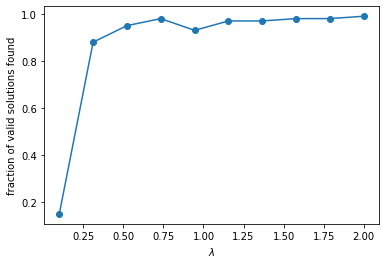

In [185]:
lambdas = np.linspace(.1, 2, 10)
fraction_valid_solutions = []

for l in lambdas:
    res = qv.sim.anneal_quso(quso.subs({lam: l}), num_anneals=100)
    # convert the solution to the QUSOMatrix to the solution to the original model
    converted = res.convert_states(lambda s: model.convert_solution(s, spin=True))
    # filter out the solutions that violate the constraints
    valid = converted.filter_states(model.is_solution_valid)
    
    fraction_valid_solutions.append(len(valid) / len(res))

plt.plot(lambdas, fraction_valid_solutions, 'o-')
plt.xlabel("$\lambda$")
plt.ylabel("fraction of valid solutions found")
plt.show()

There is one slight thing to watch out for. I do not consider this unexpected behavior or a bug because it really makes perfect sense why it would happen, and indeed I think it *should* happen. Nonetheless it may catch you by surprise if you're not ready for it. And this is the fact that if you were try to do exact as above but with $\lambda = 0$ then you will get a KeyError.

In [186]:
res = qv.sim.anneal_quso(quso.subs({lam: 0}), num_anneals=100)
try:
    converted = res.convert_states(lambda s: model.convert_solution(s, spin=True))
except KeyError as e:
    print("KeyError:", e)

KeyError: 30


The reason this happens is because the `model.convert_solution` method is looking for all the ancilla variable values, but the output of the simulated annealer will not have these because they don't exist when $\lambda = 0$! Ie:

In [187]:
print(model.variables)
print()
print(model.subs({lam: 0}).variables)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, '__a1', '__a3', '__a2', '__a0'}

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}


**So you just always need to watch out for situations when** *using the `.subs` method with symbols may completely change the structure of your problem, changing which variables are involved in the problem.*

By the way, there is a `.simplify` method to simplify objects that use symbols.

In [188]:
x, y = qv.boolean_var('x'), qv.boolean_var('y')
P = (A+B)**2 * x + y*(A*B + B + B**2)
print(P)
print()
P.simplify()
print(P)

{('x',): (A + B)**2, ('y',): A*B + B**2 + B}

{('x',): 1.0*(A + B)**2, ('y',): 1.0*B*(A + B + 1)}


## Tip #2: keeping functions and constraints separate with PCBOs and PCSOs.

I made the design choice to *automatically add penalty terms to PCBOs and PCSOs*, a choice that I still sometimes second-guess. This often leads to come confusion, because it makes it *feel* like PCBOs and PCSOs are just PUBOs and PUSOs. So for example, if I want to minimize $\sum_{i=0}^5 x_i$ subject to the constraint that $\sum_{i=0}^4 x_i x_{i+1} \leq 1$, we can do the following.

In [189]:
from sympy import Symbol

lam = Symbol('lam')
x = [qv.boolean_var(i) for i in range(6)]
model = sum(x)
model.add_constraint_le_zero(sum(x[i] * x[i+1] for i in range(5)) - 1, lam=lam)
print(model.pretty_str())

x(0) + x(1) + x(2) + x(3) + x(4) + x(5) + (lam) x(0) x(1) x(2) + (lam) x(0) x(1) x(2) x(3) + (lam) x(0) x(1) x(3) x(4) + (lam) x(0) x(1) x(4) x(5) + (lam) x(1) x(2) x(3) + (lam) x(1) x(2) x(3) x(4) + (lam) x(1) x(2) x(4) x(5) + (lam) x(2) x(3) x(4) + (lam) x(2) x(3) x(4) x(5) + (lam) x(3) x(4) x(5)


We see that the penalty term that enforces the constraint has already been added to the function. So model is already in PUBO form. Oftentimes you may want to access only the objective function or only the penalty function. Of course there are many ways to do this. First, if you ever want to access just the objective function, you can substitute $\lambda = 0$.

In [190]:
objective = model.subs({lam: 0})
print(objective.pretty_str())

x(0) + x(1) + x(2) + x(3) + x(4) + x(5)


But the best way to separate functions and constraints is to just keep them separate to start with! Consider the modified example here.

In [191]:
x = [qv.boolean_var(i) for i in range(6)]
objective_function = sum(x)
penalty_function = qv.PCBO().add_constraint_le_zero(sum(x[i] * x[i+1] for i in range(5)) - 1, lam=lam)

print("objective function : ", objective_function.pretty_str())
print("penalty function   : ", penalty_function.pretty_str())

objective function :  x(0) + x(1) + x(2) + x(3) + x(4) + x(5)
penalty function   :  (lam) x(0) x(1) x(2) + (lam) x(0) x(1) x(2) x(3) + (lam) x(0) x(1) x(3) x(4) + (lam) x(0) x(1) x(4) x(5) + (lam) x(1) x(2) x(3) + (lam) x(1) x(2) x(3) x(4) + (lam) x(1) x(2) x(4) x(5) + (lam) x(2) x(3) x(4) + (lam) x(2) x(3) x(4) x(5) + (lam) x(3) x(4) x(5)


If you want to get the value of the objective function, you can do `objective_function.value`. If you want to see if a solution satisfies the constraints, you can use `penalty_function.is_solution_valid`.

In [192]:
solution = {0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5: 1}
print(objective_function.value(solution))
print(penalty_function.is_solution_valid(solution))

3
True


## Tip #3: bounds as a constraint argument

PCBOs and PCSOs have the six constraint methods `.add_constraint_blank_zero(expression)`, where `blank` is one of `eq`, `ne`, `lt`, `le`, `gt`, `ge` (the PCBO object also has boolean logic constraints, but those are unimportant for this tip). As we saw earlier, something like `.add_constraint_le_zero(expression)` will add a penalty to the function that enforces that a valid solution will satisfy `expression <= 0`. It does this by trying to determine what the maximum and minimum values are that `expression` can take, and adding the appropriate number of ancillas to convert the inequality constraint into an equality constraint with these ancillas. In particular it uses the `qv.utils.approximate_pubo_extrema`, `qv.utils.approximate_puso_extrema`, `qv.utils.approximate_qubo_extrema`, and `qv.utils.approximate_quso_extrema` functions to put bounds on the maximum and minimum values that the expression can take. For many expressions, these functions work great, but sometimes they get it very wrong! Consider the simple example $$P = \sum_{i=0}^{9}x_i - 5,$$ which can takes values from -5 to 5.

In [193]:
P = sum(qv.boolean_var(i) for i in range(10)) - 5
print(qv.utils.approximate_pubo_extrema(P))

(-5, 5)


It gets it right, which means that if we were to put $P$ into the `.add_constraint_le_zero` method, it would use the right amount of ancillas, namely $\lceil \log_2 5 \rceil = 3$.

In [194]:
qv.PCBO().add_constraint_le_zero(P).num_ancillas

3

But what if we try to do $$P = \sum_{i=0}^{8} (1-x_i)x_{i+1} - 3.$$

In [195]:
P = sum((1-qv.boolean_var(i)) * qv.boolean_var(i+1) for i in range(9)) - 3

We can figure out the true upper and lower bounds by doing the following.

In [196]:
print("minimum value:", P.value(P.solve_bruteforce()))
print("maximum value:", P.value((-P).solve_bruteforce()))

minimum value: -3
maximum value: 2


But let's see what the approximate function gives.

In [197]:
qv.utils.approximate_pubo_extrema(P)

(-12, 6)

This is very off! However, it *does* bound $P$, just not very tightly. Since it bounds $P$, it will suffice when using the constraint methods, but it will result in an unneccessary number of ancilla variables. Because of the true bounds $(-3, 2)$, we should only need $\lceil \log2 3 \rceil = 2$ ancilla variables for the $\leq$ constraint, but let's see what i actually gives us.

In [198]:
qv.PCBO().add_constraint_le_zero(P).num_ancillas

4

That's one too many. To fix this, we can supply the bounds ourselves if we know them.

In [199]:
qv.PCBO().add_constraint_le_zero(P, bounds=(-3, 2)).num_ancillas

2

In general, if you know the bounds on your constraints, you should supply them. Because it will either ensure that you are using the smallest number of ancillas, or even if qubovert by default gets it right it will slightly speed up the computation because the `add_constraint_...` method will not call the `qv.utils.approximate_..._extrema` method.

## Tip #4: log_trick as constraint argument

Consider adding a penalty to an objective function that enforces that an expression $P$ equals zero. As we discussed above, a possible penalty function is $\lambda P^2$ where $\lambda$ is a sufficiently large Lagrange multiplier. When we enforce inequality constraints, we first convert them to equality constraints. Let's consider the example of adding the constraint $$P = \sum_{i=0}^{19}x_i - 10 \leq 0.$$

In [200]:
P = sum(qv.boolean_var(i) for i in range(20)) - 10

By default, qubovert will use a penalty function of the form $$\left(\sum_{i=0}^{19}x_i - 10 + \sum_{j=0}^3 2^j a_j \right)^2$$ where each $a_j$ is an ancilla variable, thus using four ancillas. The ancillas encode an integer in binary using $\sim \log_2(- \min P)$ ancillas; thus we call this the `log_trick`.

In [201]:
penalty = qv.PCBO().add_constraint_le_zero(P)
print(penalty.num_ancillas)

4


Sometimes though you many not want such a large dynamical range of the coefficients in the penalty.

In [202]:
set(penalty.values())

{-96, -64, -36, -19, 2, 4, 8, 16, 32, 64, 100}

We can see that the coefficients range from $-96$ to $100$, and particular this range would grow as the number of terms in the constraint grows. Let's say you want to solve this problem with D-Wave's quantum hardware -- their quantum annealer has $\lesssim 6$ bits of precision! If you want to be able to resolve integers between $-96$ and $100$ you need $\sim \log_2(196) \approx 8$ bits of precision. So this already cannot be represented on D-Wave's hardware even though it's such a tiny example The way around this is to not use a binary encoding of integers with the ancillas. We would like to have a penalty like 

$$\left(\sum_{i=0}^{19}x_i - \sum_{j=0}^{9} a_j\right)^2.$$

This uses way more ancilla variables, but the dynamical range required to respresent the coefficients will be independent of the constraint size. We can access this form of the constraint by setting `log_trick=False`.

In [203]:
penalty = qv.PCBO().add_constraint_le_zero(P, log_trick=False)
print("Number of ancillas : ", penalty.num_ancillas)
print("Coefficients       : ", set(penalty.values()))

Number of ancillas :  10
Coefficients       :  {1, 2, -2}


In general whenever you are working with D-Wave's hardware, you will almost always want to set `log_trick=False`. Similarly, sometimes it is also best to do this when you are working with simulated annealing, but it really depends. By the way, there is also the `log_trick` argument in the `qv.integer_var` function, which indicates how to encode an integer variable. Here we'll show how to encode a integer variable $v$ with and without the `log_trick` using 5 bits.

In [204]:
print("log_trick=True  : ", qv.integer_var('v', 5))
print("log_trick=False : ", qv.integer_var('v', 5, log_trick=False))

log_trick=True  :  {('v0',): 1, ('v1',): 2, ('v2',): 4, ('v3',): 8, ('v4',): 16}
log_trick=False :  {('v0',): 1, ('v1',): 1, ('v2',): 1, ('v3',): 1, ('v4',): 1}


## Tip #5: special constraints

As usual, I will be talking about PCBOs in this section, but most of what I say also applies to PCSOs. Let's start of by considering the `.add_constraint_eq_zero(P, **kwargs)` method. This method will add a constraint to the model that enforces that the PUBO $P = 0$. Most of the time, this means adding a penalty of the form $\lambda P^2$. So let's consider the example of $P = x_0 + x_1 - 2x_2$.

In [205]:
from sympy import Symbol

lam = Symbol('lam')
xs = [qv.boolean_var(i) for i in range(3)]

P = xs[0] + xs[1] - 2 * xs[2]

print(qv.PCBO().add_constraint_eq_zero(P, lam=lam) == lam * P**2)

True


Indeed we see that the penalty is simply $\lambda P^2$. But qubovert will also check the form of $P$ to see if it can do a little bit better. So consider instead the example $P = x_0 + x_1 + x_2$. We can see that this is just saying that $x_0, x_1$ and $x_2$ need to be zero since none of them can be negative. Thus $P \geq 0$, and there is no need to square $P$ to create the penalty. Indeed, we can just add a penalty $\lambda P$.

In [206]:
P = sum(xs)
print(qv.PCBO().add_constraint_eq_zero(P, lam=lam) == lam * P)

True


Similarly, if $P = -x_0 - x_1 - x_2$ then we can just add a penalty $-\lambda P$.

In [207]:
P = -sum(xs)
print(qv.PCBO().add_constraint_eq_zero(P, lam=lam) == -lam * P)

True


Let me show one more example of the equality constraint and then move on. Consider the constraint that $P = 0$ where

$$P = x_2 - x_0 x_1.$$

$P$ can take on values in $\{-1, 0, 1 \}$, thus naively we may think that we need to add a penalty $\lambda P^2$. But recall the constraint `.add_constraint_eq_AND(c, a, b)` which enforces that $c = a\land b$. This constraint came up in the context of PUBO degree recution. We can enforce that $c = a \land b$ with a degree 2 term whereas $P^2$ is degree 3. Fortunately, qubovert will recognize that $P$ is of this form and will automatically use the better penalty.

In [208]:
P = xs[2] - xs[0] * xs[1]

penalty = qv.PCBO().add_constraint_eq_zero(P, lam=lam)

print(penalty.pretty_str())
print(penalty == qv.PCBO().add_constraint_eq_AND(xs[2], xs[0], xs[1], lam=lam))
print(penalty.degree)
print((P**2).degree)

(3*lam) x(2) + (lam) x(0) x(1) + (-2*lam) x(0) x(2) + (-2*lam) x(1) x(2)
True
2
3


And of course we could similarly change the sign of $P$ and get the same result.

In [209]:
P = -xs[2] + xs[0] * xs[1]

penalty = qv.PCBO().add_constraint_eq_zero(P, lam=lam)

print(penalty.pretty_str())
print(penalty == qv.PCBO().add_constraint_eq_AND(xs[2], xs[0], xs[1], lam=lam))
print(penalty.degree)
print((P**2).degree)

(3*lam) x(2) + (lam) x(0) x(1) + (-2*lam) x(0) x(2) + (-2*lam) x(1) x(2)
True
2
3


Okay let's move onto inequality constraints. I won't show all of the special constraints that qubovert looks out for. Let me just show one inequality constraint. Consider the constraint that

$$P \leq 0.$$

A general way to enforce this constraint is as follows:
1. Determine a lower bound on the value that $P$ can take; call this bound $P_\ell$, if $P_\ell \geq 0$ then we're done.
2. Add ancilla variables and encode an integer that can take values from $0$ to $-P_\ell$; call this encoding $\alpha$ (it will be a weighted sum of boolean variables).
3. Enforce that $P + \alpha = 0$ by adding a penalty term $\lambda (P + \alpha)^2$ to the model. This way, there will exist an assignment of values of the variables encoding $\alpha$ such that $P+\alpha = 0$.

qubovert usually does this procedure, but sometimes we can do better than this. Consider 

$$P = \sum_{i=0}^{4}x_i - 1 \leq 0.$$

According to our generic procedure above, we would introduce an ancilla boolean variable $\alpha$ and add a penalty term $\lambda(P + \alpha)^2$. But we can actually don't have to introduce an ancilla variable at all. The penalty

$$\lambda \left(\sum_{i=0}^{3}\sum_{j=i+1}^{4}x_i x_{j} \right)$$

is sufficient. And indeed qubovert will recognize this constraint and use the special penalty.

In [210]:
xs = [qv.boolean_var(i) for i in range(5)]
P = sum(xs) - 1
print(qv.PCBO().add_constraint_le_zero(P, lam=lam))

{(0, 1): lam, (0, 2): lam, (0, 3): lam, (0, 4): lam, (1, 2): lam, (1, 3): lam, (1, 4): lam, (2, 3): lam, (2, 4): lam, (3, 4): lam}


In summary, qubovert recognizes a handful of special constraints for which it will not apply the generic constraint procedure. One of the goals of qubovert is to become a good repository of special constraints, so I plan to continue adding these as I find them.

## Tip #6: setting penalty in degree reduction

When performing the degree reduction from, say, a PUBO to QUBO, qubovert tries to find the pairs of variables that occur together the most and then define ancillas that are then enforced to be equal to the product of each pair. This was discussed earlier in this notebook. Let's look at a simple example.

In [211]:
P = qv.boolean_var(0) * qv.boolean_var(1) * qv.boolean_var(2)
P.set_mapping({0: 0, 1: 1, 2: 2}) # enforce simple integer enumeration for viewing pleasure
print(P.pretty_str())

x(0) x(1) x(2)


Now what happens if we reduce it to a QUBO.

In [212]:
qubo = P.to_qubo()
print(qubo.pretty_str())

6 x(3) + 2 x(0) x(1) - 4 x(0) x(3) - 4 x(1) x(3) + x(2) x(3)


What happened was that we introduced a new variable `3` and enforced that it was equal to the product of the variables `0` and `1` with a penalty factor of `2`. See here.

In [213]:
d = qv.boolean_var(2) * qv.boolean_var(3)
d.add_constraint_eq_AND(3, 0, 1, lam=2)
print(d == qubo)

True


The `lam` argument in the `.to_qubo` and `.to_pubo` method is chosen automatically. Please read the docstring for more details. But long story short, the default `lam` is usually pretty good. But if you want to change it, you have two options. The first is to provide a number or symbol.

In [214]:
from sympy import Symbol

lam = Symbol('lam')
qubo = P.to_qubo(lam=lam)
print(qubo.pretty_str())

(3*lam) x(3) + (lam) x(0) x(1) + (-2*lam) x(0) x(3) + (-2*lam) x(1) x(3) + x(2) x(3)


Then you can use the `.subs` method as we discussed before to replace the symbol with a number. To use a number right away:

In [215]:
qubo = P.to_qubo(lam=5)
print(qubo.pretty_str())

15 x(3) + 5 x(0) x(1) - 10 x(0) x(3) - 10 x(1) x(3) + x(2) x(3)


The second option is to use a function. This function performs as follows. Assume that you define a function $f:\mathbb R \to \mathbb R$. When qubovert encounters a term like $c x_0 x_1 x_2$ (where $c$ is a coefficient), it will define a new variable $x_3$ to encode the product $x_0x_1$ and turn this term into

$$c x_2 x_3 + f(c)\left(3 x_3 + x_0 x_1 - 2 x_0 x_3 - 2 x_1 x_3\right).$$

By default, qubovert sets $f$ (ie the argument `lam`) as $f(c) = 1+|c|$, but you can change that. For example:

In [216]:
qubo = P.to_qubo(lam=lambda c: 2 + abs(c))
print(qubo.pretty_str())

9 x(3) + 3 x(0) x(1) - 6 x(0) x(3) - 6 x(1) x(3) + x(2) x(3)


Note that in the former case where we set `lam` equal to a number or symbol, qubovert just converts this to the constant function `lambda c: lam`. There is one more gritty detail to know about the degree reduction procedure; the function $f$ will be supplied everytime an ancilla is used, even if it has been used before. Consider the following PUBO,

$$P = x_0x_1(a x_2 + b x_3) \qquad a, b \in \mathbb R.$$

When we perform a degree reduction on this PUBO and we supply a penalty function $f$ (or just leave it as the default $f(c) = 1 + |c|$), qubovert will recognize that the product $x_0 x_1$ occurs most often, and will therefore introduce the variable $x_4$ to encode the product $x_0 x_1$. Then, since $x_4$ will be used twice, the constraint that $x_4 = x_0x_1$ will be enforce twice. Thus the resulting QUBO will be

$$Q = x_4(ax_2 + bx_3) + \left(f(a) + f(b)\right)\left(3 x_4 + x_0 x_1 - 2 x_0 x_4 - 2 x_1 x_4\right).$$

Let's show this example where we set $f(c) = |c|$.

In [217]:
x0, x1 = qv.boolean_var(0), qv.boolean_var(1)
x2, x3 = qv.boolean_var(2), qv.boolean_var(3)
a, b = Symbol('a'), Symbol('b')
f = lambda c: abs(c)

P = x0 * x1 * (a * x2 + b * x3)
P.set_mapping(enumerate(range(4))) # enforce simple integer enumeration for viewing pleasure

print("P =", P.pretty_str())
print()

Q = P.to_qubo(lam=f)
print("Q =", Q.pretty_str())

P = (a) x(0) x(1) x(2) + (b) x(0) x(1) x(3)

Q = (3*Abs(a) + 3*Abs(b)) x(4) + (Abs(a) + Abs(b)) x(0) x(1) + (-2*Abs(a) - 2*Abs(b)) x(0) x(4) + (-2*Abs(a) - 2*Abs(b)) x(1) x(4) + (a) x(2) x(4) + (b) x(3) x(4)


Let's see if this matches what we thought it would be.

In [218]:
x4 = qv.boolean_var(4)

what_we_thought = (
    x4 * (a*x2 + b*x3) + 
    (f(a) + f(b)) * qv.PCBO().add_constraint_eq_AND(x4, x0, x1)
)
print(what_we_thought == Q)

True


Okay I'm not sure if all that detail is necessary to put here, but it's here now so hopefully it's useful. As always, all of this info is the docstrings.

## Tip #7: manually choosing pairs for degree reduction

When performing the degree reduction from, say, a PUBO to QUBO, qubovert tries to find the pairs of variables that occur together the most and then define ancillas that are then enforced to be equal to the product of each pair. This was discussed earlier in this notebook. However, finding the *optimal* variables to pair together is in general a NP-Hard problem (because it can be reduced to a Vertex Cover problem). Therefore, qubovert's method will not always do as well as we can do. Though it usually does pretty well, let me show you an example of where we can actually do better than qubovert. Consider the function
$$P = \left(\sum_{i=0}^8 x_i \bar x_{i+1} + x_9\right)^2.$$

In [219]:
xs = [qv.boolean_var('x%d' % i) for i in range(10)]
P = sum(xs[i] * qv.sat.NOT(xs[i+1]) for i in range(9)) + xs[9]
P **= 2
P.degree

4

Let's say we now reduce this to a QUBO and check how many extra variables it introduces to achieve the degree reduction.

In [220]:
P.to_qubo().num_binary_variables - P.num_binary_variables

14

You may be able to already tell a better way to choose the pairs, namely nearest neighbors! Let's see how many extra variables are added in the degree reduction if we tell qubovert to look for pairs of variables that are nearest neighbors.

In [221]:
pairs = {(xs[i].name, xs[i+1].name) for i in range(9)}
P.to_qubo(pairs=pairs).num_binary_variables - P.num_binary_variables

9

That's five less. This example illistrates that qubovert's degree reduction is not necessarily optimal! So if you are able to figure out a better way of selecting pairs for the degree reduction then you should supply those pairs to the `.to_` methods.

## Tip #8: bruteforce solver options

As is almost always the case throughout all of qubovert, most of the functions in the `qubovert.utils` library will work with generic Python dictionaries and with qubovert objects. But for convenience, you can access the utilities as methods for Python objects. So for example, let's say you have some generic spin function
$$S = \sum_{i=0}^8 z_iz_{i+1} \qquad z_i \in \{1, -1 \}.$$

In [222]:
z = [qv.spin_var(i) for i in range(10)]
S = sum(z[i] * z[i+1] for i in range(9))
print(S)
print()
print(S.pretty_str())

{(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (5, 6): 1, (6, 7): 1, (7, 8): 1, (8, 9): 1}

z(0) z(1) + z(1) z(2) + z(2) z(3) + z(3) z(4) + z(4) z(5) + z(5) z(6) + z(6) z(7) + z(7) z(8) + z(8) z(9)


We know that `S` is a `qubovert.PCSO` object. But just to demonstrate that the bruteforce utility will work with generic dictionaries, let's convert it to a plain `dict`.

In [223]:
S_dict = dict(S)
print(S_dict)

{(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (5, 6): 1, (6, 7): 1, (7, 8): 1, (8, 9): 1}


With the plain dictionary, we can solve this QUSO or PUSO (it is both of these) with the `solve_quso_bruteforce` or `solve_puso_bruteforce` functions.

In [224]:
value, state = qv.utils.solve_puso_bruteforce(S_dict)
print("value : ", value)
print("state : ", state)

value :  -9
state :  {0: 1, 1: -1, 2: 1, 3: -1, 4: 1, 5: -1, 6: 1, 7: -1, 8: 1, 9: -1}


Solve bruteforce minimizes the function. Now we can do a very similar thing with `S`, the PCSO object, by using the `.solve_bruteforce` method. Of course we could also use the utility function, but this may be cleaner.

In [225]:
state = S.solve_bruteforce()
print("value : ", S.value(state))
print("state : ", state)

value :  -9
state :  {0: 1, 1: -1, 2: 1, 3: -1, 4: 1, 5: -1, 6: 1, 7: -1, 8: 1, 9: -1}


If you're looking carefully, you'll notice that the solution to $S$ is degenerate. So let's see how we can get all the solutions that give the same minimum value.

In [226]:
value, states = qv.utils.solve_puso_bruteforce(S_dict, all_solutions=True)
print("value  : ", value)
print("states : ")
for state in states:
    print("   ", state)

value  :  -9
states : 
    {0: 1, 1: -1, 2: 1, 3: -1, 4: 1, 5: -1, 6: 1, 7: -1, 8: 1, 9: -1}
    {0: -1, 1: 1, 2: -1, 3: 1, 4: -1, 5: 1, 6: -1, 7: 1, 8: -1, 9: 1}


Now let's do the same thing with the method.

In [227]:
states = S.solve_bruteforce(all_solutions=True)
print("value  : ", S.value(states[0]))
print("states : ")
for state in states:
    print("   ", state)

value  :  -9
states : 
    {0: 1, 1: -1, 2: 1, 3: -1, 4: 1, 5: -1, 6: 1, 7: -1, 8: 1, 9: -1}
    {0: -1, 1: 1, 2: -1, 3: 1, 4: -1, 5: 1, 6: -1, 7: 1, 8: -1, 9: 1}


Okay finally let's provide constraints. Let's say that we only consider solutions valid if spin 0 and spin 1 are the same sign.

In [228]:
value, states = qv.utils.solve_puso_bruteforce(
    S_dict, all_solutions=True,
    valid=lambda s: s[0] == s[1]
)
print("value  : ", value)
print("states : ")
for state in states:
    print("   ", state)

value  :  -7
states : 
    {0: 1, 1: 1, 2: -1, 3: 1, 4: -1, 5: 1, 6: -1, 7: 1, 8: -1, 9: 1}
    {0: -1, 1: -1, 2: 1, 3: -1, 4: 1, 5: -1, 6: 1, 7: -1, 8: 1, 9: -1}


Notice however that *we cannot do the same thing with the method*.

In [229]:
try:
    states = S.solve_bruteforce(
        all_solutions=True,
        valid=lambda s: s[0] == s[1]
    )
except TypeError as e:
    print("TypeError:", e)

TypeError: solve_bruteforce() got an unexpected keyword argument 'valid'


This is because `S` is a qubovert object and thus has an `.is_solution_valid` method. Since in this case `S` is a `PCSO`object, the `.is_solution_valid` method will check to make sure all of the inputted constraints are satisfed. When you call `.solve_bruteforce` it actually calls `qv.utils.solve_puso_bruteforce` and automatically suppiles the `valid` argument to be `S.is_solution_valid`. Thus if you want `.solve_bruteforce` to ensure that a constraint is satisfied, you need to add the constraint to the `PCSO` object. Even if you were to, for example, enforce the constraint with a penalty factor $\lambda = 0$, the `.solve_bruteforce` method will still ensure that the constraint is satisfied.

In [230]:
S.add_constraint_eq_zero(z[0] - z[1], lam=0)
print(S)
print()
states = S.solve_bruteforce(all_solutions=True)
print("value  : ", S.value(states[0]))
print("states : ")
for state in states:
    print("   ", state)

{(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (5, 6): 1, (6, 7): 1, (7, 8): 1, (8, 9): 1}

value  :  -7
states : 
    {0: 1, 1: 1, 2: -1, 3: 1, 4: -1, 5: 1, 6: -1, 7: 1, 8: -1, 9: 1}
    {0: -1, 1: -1, 2: 1, 3: -1, 4: 1, 5: -1, 6: 1, 7: -1, 8: 1, 9: -1}


Notice that since we set `lam=0` the actual function is not changed! But the internal constraints are updated and thus `.solve_bruteforcd` will satisfy them.

In [231]:
S.constraints

{'eq': [{(0,): 1, (1,): -1}]}

## Tip #9: normalizing problems

Often times when working with boolean or spin functions, you may want to normalize the coefficients so they lie within some range. This is especially true when you're working with D-Wave and you are using their embedder to embed QUBO or Ising problems onto their hardware graph. If you just have a plan old `dict`, then you can use the `normalize` utility function.

In [232]:
function = {(i, j): i * j for i in range(5) for j in range(5)}
print(qv.utils.normalize(function))

{(0, 0): 0.0, (0, 1): 0.0, (0, 2): 0.0, (0, 3): 0.0, (0, 4): 0.0, (1, 0): 0.0, (1, 1): 0.0625, (1, 2): 0.125, (1, 3): 0.1875, (1, 4): 0.25, (2, 0): 0.0, (2, 1): 0.125, (2, 2): 0.25, (2, 3): 0.375, (2, 4): 0.5, (3, 0): 0.0, (3, 1): 0.1875, (3, 2): 0.375, (3, 3): 0.5625, (3, 4): 0.75, (4, 0): 0.0, (4, 1): 0.25, (4, 2): 0.5, (4, 3): 0.75, (4, 4): 1.0}


This will make it so that the coefficients of the function lie within $[-1, 1]$. If you'd rather them lie within $[-2, 2]$, then you can supply an additional argument.

In [233]:
print(qv.utils.normalize(function, 2))

{(0, 0): 0.0, (0, 1): 0.0, (0, 2): 0.0, (0, 3): 0.0, (0, 4): 0.0, (1, 0): 0.0, (1, 1): 0.125, (1, 2): 0.25, (1, 3): 0.375, (1, 4): 0.5, (2, 0): 0.0, (2, 1): 0.25, (2, 2): 0.5, (2, 3): 0.75, (2, 4): 1.0, (3, 0): 0.0, (3, 1): 0.375, (3, 2): 0.75, (3, 3): 1.125, (3, 4): 1.5, (4, 0): 0.0, (4, 1): 0.5, (4, 2): 1.0, (4, 3): 1.5, (4, 4): 2.0}


If you have a qubovert type, such as a `qv.QUBO` object, then you can use the `normalize` utility function if you want. Or if you want to update your object in-place, you can use the `.normalize` method.

In [234]:
qubo = qv.QUBO(function)
qubo.normalize()
print(qubo)

{(1,): 0.041666666666666664, (1, 2): 0.16666666666666666, (1, 3): 0.25, (1, 4): 0.3333333333333333, (2,): 0.16666666666666666, (2, 3): 0.5, (2, 4): 0.6666666666666666, (3,): 0.375, (3, 4): 1.0, (4,): 0.6666666666666666}


Again, if you wanted instead for the coefficients to lie with say $[-5.5, 5.5]$, then you can do the following.

In [235]:
qubo.normalize(5.5)
print(qubo)

{(1,): 0.22916666666666666, (1, 2): 0.9166666666666666, (1, 3): 1.375, (1, 4): 1.8333333333333333, (2,): 0.9166666666666666, (2, 3): 2.75, (2, 4): 3.6666666666666665, (3,): 2.0625, (3, 4): 5.5, (4,): 3.6666666666666665}


You can see that with the normalization you may want to round the coefficients.

In [236]:
print(round(qubo, 2))

{(1,): 0.23, (1, 2): 0.92, (1, 3): 1.38, (1, 4): 1.83, (2,): 0.92, (2, 3): 2.75, (2, 4): 3.67, (3,): 2.06, (3, 4): 5.5, (4,): 3.67}


## Tip #10: getting subvalues

Consider that you have the function
$$d(x_0, x_1, x_2, x_3, a, b) = x_0x_1 - 3x_0x_2x_3 + 5 + a b x_0 - a + 4b.$$

In [237]:
d = {
    (0, 1): 1, (0, 2, 3): -3, (): 5,
    ('a', 'b', 0): 4, ('a',): -1, ('b',): 4
}

Let's say that we want to set $x_0 = 1$, $b = 0$, and $x_2 = -2$. The resulting function then is

$$d'(x_1, x_3, a) = d(1, x_1, -2, x_3, a, 0) = x_1 + 6x_3 + 5 -a.$$

We can get $d'$ with the `subvalue` function.

In [238]:
values = {0: 1, 'b': 0, 2: -2}
d_prime = qv.utils.subvalue(values, d)
print(d_prime)

{(1,): 1, (3,): 6, (): 5.0, ('a',): -1.0}


Notice that the `subvalue` function will work with `dict`s, and it will also work with all qubovert objects because they are just subclasses of `dict`s! But when you have a qubovert object, you can instead just use the `.subvalue` method. For example, cosider that $d$ is a PUBO.

In [239]:
d_pubo = qv.PUBO(d)
print(d_pubo)

{(0, 1): 1, (0, 2, 3): -3, (): 5, ('a', 0, 'b'): 4, ('a',): -1, ('b',): 4}


We can get the PUBO object representing $d'$ with the following.

In [240]:
d_pubo_prime = d_pubo.subvalue(values)
print(d_pubo_prime)

{(1,): 1, (3,): 6, (): 5.0, ('a',): -1.0}


Notice that the `PUBO.subvalue` method will allow you to supply values that are not boolean! Similarly, the `PUSO.subvalue` method will allow you to supply values that are not spins. Use your discretion when using this method in terms of what values you provide.

Let me show a simple example of using the `subvalue`. Let's consider the 3SAT problem

$$(x_0 \lor x_1 \lor \bar x_3) \land (x_0 \lor \bar x_2 \lor x_3) \land (\bar x_0 \lor \bar x_1 \lor x_3).$$

We'll create a PUBO object prepresenting it. Notice that we make the expression negative. This is because qubovert considers solving a problem to be minimizing it. But the 3SAT problem is solved if it is equal to 1, and not satisfied if it is equal to 0. Thus we negate the whole expression.

In [241]:
P = -qv.sat.AND(
    qv.sat.OR(0, 1, qv.sat.NOT(3)),
    qv.sat.OR(0, qv.sat.NOT(2), 3),
    qv.sat.OR(qv.sat.NOT(0), qv.sat.NOT(1), 3)
)

Let's iterate through the two possible values for $x_0$, and then solve the resulting problem. I don't really know why you'd want to do that, but it's just an example of usage.

In [242]:
for v in (0, 1):
    sols = P.subvalue({0: v}).solve_bruteforce(True)
    print("If x0 =", v, "then:")
    for sol in sols:
        print("   ", sol, "satisfies")

If x0 = 0 then:
    {1: 0, 3: 0, 2: 0} satisfies
    {1: 1, 3: 0, 2: 0} satisfies
    {1: 1, 3: 1, 2: 0} satisfies
    {1: 1, 3: 1, 2: 1} satisfies
If x0 = 1 then:
    {3: 0, 1: 0, 2: 1} satisfies
    {3: 1, 1: 0, 2: 0} satisfies
    {3: 1, 1: 0, 2: 1} satisfies
    {3: 1, 1: 1, 2: 0} satisfies
    {3: 1, 1: 1, 2: 1} satisfies


Note that that this example is not particularly useful, but you could imagine doing a similar process with a decomposition solver.

**In summary**, the `subvalue` function and `.subvalue` method are used to supply values for any of the variables of a model, and they will output the resulting model. This differs from the `pubo_value`, `puso_value`, etc functions and the `.value` method because these require you to supply values for *all* of the variables and will thus return a number, whereas the `subvalue` functionality allows you to supply values for any number of the variables and will output an object representing the resulting model.

## Tip #11: getting subgraphs

Let's consider that we have the same function as above,

$$d(x_0, x_1, x_2, x_3, a, b) = x_0x_1 - 3x_0x_2x_3 + 5 + a b x_0 - a + 4b.$$

In [243]:
d = {
    (0, 1): 1, (0, 2, 3): -3, (): 5,
    ('a', 'b', 0): 4, ('a',): -1, ('b',): 4
}

Now what if want the same function but that only includes the variables $x_0, a, b$ with all other variables set to $0$.

In [244]:
include = {0, 'a', 'b'}
print(qv.utils.subgraph(d, include))

{('a', 'b', 0): 4.0, ('a',): -1.0, ('b',): 4.0}


The difference between `subvalue` and `subgraph` is basically that with `subvalue` we were saying "replace these variables with these values", whereas with `subgraph` we are saying "only include these variables". The input into `subgraph` tells what variables we care about, and note that constant terms that are input are always ignored.

If we wanted to do the same thing, ie only include the variables $x_0, a, b$, but this time set the other variables to 1, then we can use the `connection` optional argument.

In [245]:
connections = {1: 1, 2: 1, 3: 1}
print(qv.utils.subgraph(d, include, connections))

{(0,): -2, ('a', 'b', 0): 4.0, ('a',): -1.0, ('b',): 4.0}


Now let's consider if we convert it to a PUBO and use the `.subgraph` method.

In [246]:
d_pubo = qv.PUBO(d)
print(d_pubo.subgraph(include))

{('a', 0, 'b'): 4.0, ('a',): -1.0, ('b',): 4.0}


In [247]:
print(d_pubo.subgraph(include, connections))

{(0,): -2, ('a', 0, 'b'): 4.0, ('a',): -1.0, ('b',): 4.0}


The `subgraph` and `subvalue` function and methods are obviously very closely related. I would recommend mostly just sticking with the `subvalue` function.

## Tip #12: using the AnnealResults object

I haven't gone over anything more than basic annealing functionality, and I won't go over it in this tutorial. Please see the [annealing notebook](https://github.com/jtiosue/qubovert/blob/master/notebook_examples/Annealing.ipynb) for more advanced usage. In this section, I will show some convenient features that the `AnnealResults` object has. To start off, let's look at its MRO.

In [248]:
qv.sim.AnnealResults.mro()

[qubovert.sim._anneal_results.AnnealResults, list, object]

You can see that it is a direct descendent of Python's builtin `list` object, and indeed you can do almost all the same operations with an `AnnealResults` object that you can with a `list`. Let's begin by creating two `AnnealResults` objects by simply getting the output of an anneal. We don't really care what the model is so we'll just create some arbitrary edge set and create a Vertex Cover instance. I will seed random so that this notebook is reproducible.

In [249]:
import random
random.seed(123)

edges = {
    (i, j) 
    for i in range(10) for j in range(i+1, 10)
    if random.random() < .5
}
problem = qv.problems.VertexCover(edges)

Okay cool now we have an arbitrary problem in hand. Let's use `anneal_quso` and `anneal_qubo` on the respective QUSO and QUBO. I will seed the simulated annealer so that this notebook is reproducible. I will also make the anneal duration absurdly short because for this example I don't want the simulated annealer to get the answer right every time!

In [250]:
quso_res = qv.sim.anneal_quso(problem.to_quso(), num_anneals=5, anneal_duration=2, seed=4)
qubo_res = qv.sim.anneal_qubo(problem.to_qubo(), num_anneals=5, anneal_duration=2, seed=13)

print(len(quso_res), len(qubo_res))

5 5


Let's look at the best sample from both of these.

In [251]:
print("Best quso result:")
print(quso_res.best)
print()
print("Best qubo result:")
print(qubo_res.best)

Best quso result:
  state: {0: -1, 1: -1, 2: -1, 3: 1, 4: -1, 5: 1, 6: 1, 7: -1, 8: -1, 9: 1}
  value: 6
   spin: True

Best qubo result:
  state: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0, 7: 0, 8: 1, 9: 0}
  value: 7
   spin: False


Well it's kind of annoying that we are keeping track of two results right? So let's add them together. But we shouldn't deal with one of the being boolean and one of the spin, so let's convert the `quso_res` to boolean, and then add it to `qubo_res`.

In [252]:
combined_res = qubo_res + quso_res.to_boolean()
print(len(combined_res))

10


Alright cool now we have everything in one place. Let's just print out the whole combined result.

In [253]:
print(combined_res)

AnnealResults

  state: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0, 7: 0, 8: 1, 9: 0}
  value: 7
   spin: False

  state: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0, 7: 0, 8: 0, 9: 1}
  value: 7
   spin: False

  state: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0, 7: 0, 8: 1, 9: 0}
  value: 7
   spin: False

  state: {0: 1, 1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 0, 7: 1, 8: 1, 9: 0}
  value: 7
   spin: False

  state: {0: 1, 1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 0, 7: 1, 8: 1, 9: 0}
  value: 7
   spin: False

  state: {0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 1, 6: 0, 7: 1, 8: 1, 9: 0}
  value: 8
   spin: False

  state: {0: 1, 1: 1, 2: 1, 3: 0, 4: 1, 5: 0, 6: 0, 7: 1, 8: 1, 9: 0}
  value: 6
   spin: False

  state: {0: 1, 1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 0, 7: 1, 8: 1, 9: 0}
  value: 7
   spin: False

  state: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0, 7: 0, 8: 0, 9: 1}
  value: 7
   spin: False

  state: {0: 1, 1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 0, 7: 1, 8: 0, 9: 1}
  value: 7
   spin: False


Notice that it is not in order of increasing values! If you want it to be, you can call the `.sort` method.

In [254]:
combined_res.sort()

Now if you iterate through it, you will iterate from best to worst solution. Okay so now each sample in the combined result has a state that represents the Vertex Cover somehow. Exactly how it is represented can be seen with the `problem.convert_solution` method. So let's go through and apply that method to every state in the result.

In [255]:
converted_res = combined_res.convert_states(problem.convert_solution)
print(converted_res)

AnnealResults

  state: {0, 1, 2, 4, 7, 8}
  value: 6
   spin: False

  state: {0, 1, 2, 3, 4, 5, 8}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 4, 5, 9}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 4, 5, 8}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 5, 7, 8}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 5, 7, 8}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 5, 7, 8}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 4, 5, 9}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 5, 7, 9}
  value: 7
   spin: False

  state: {0, 1, 2, 5, 7, 8}
  value: 8
   spin: False


So now the state of each sample is a set indicating which nodes of our graph are included in the Vertex Cover. Let's filter all of the ones that are invalid. For example, it looks like the last one will probably not satisfy the Vertex Cover condition that every edge is adjacent to one node included in the cover.

In [256]:
filtered_res = converted_res.filter_states(problem.is_solution_valid)
print(filtered_res)

AnnealResults

  state: {0, 1, 2, 4, 7, 8}
  value: 6
   spin: False

  state: {0, 1, 2, 3, 4, 5, 8}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 4, 5, 9}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 4, 5, 8}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 5, 7, 8}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 5, 7, 8}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 5, 7, 8}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 4, 5, 9}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 5, 7, 9}
  value: 7
   spin: False


Indeed we were right, the last solution was invalid. So that's the basic usage of this object. But let's go even more. Say for example that you wanted to filter out any solutions that did not include node 7 in their cover.

In [257]:
require_node_7 = filtered_res.filter_states(lambda state: 7 in state)
print(require_node_7)

AnnealResults

  state: {0, 1, 2, 4, 7, 8}
  value: 6
   spin: False

  state: {0, 1, 2, 3, 5, 7, 8}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 5, 7, 8}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 5, 7, 8}
  value: 7
   spin: False

  state: {0, 1, 2, 3, 5, 7, 9}
  value: 7
   spin: False


We got rid of even more. Now let's say that we want to change the values so that they indicate indicate how many more elements are included in the cover than the best solution that we found. The `AnnealResults` object is basically a beefed-up list of `AnnealResult` objects. So the `.apply_function` method will iterate through all of the elements and replace each `AnnealResult` object with one that you provide.

In [258]:
new_values = require_node_7.apply_function(
    lambda r: qv.sim.AnnealResult(
        value=r.value-require_node_7.best.value, state=r.state, spin=r.spin
    )
)
print(new_values)

AnnealResults

  state: {0, 1, 2, 4, 7, 8}
  value: 0
   spin: False

  state: {0, 1, 2, 3, 5, 7, 8}
  value: 1
   spin: False

  state: {0, 1, 2, 3, 5, 7, 8}
  value: 1
   spin: False

  state: {0, 1, 2, 3, 5, 7, 8}
  value: 1
   spin: False

  state: {0, 1, 2, 3, 5, 7, 9}
  value: 1
   spin: False


Finally, let's get rid of all the results that don't have value 0.

In [259]:
only_val_0 = new_values.filter(lambda r: r.value == 0)
print(only_val_0)

AnnealResults

  state: {0, 1, 2, 4, 7, 8}
  value: 0
   spin: False


Okay I think that's enough of that for now.

## Tip #13: using constraints without adding penalties

When adding constraints to PCBOs and PCSOs, the corresponding penalty functions are automatically added to the function. If you don't want this to happen but you still want to keep track of constraints with qubovert, then you can go one of two routes. The first option is what I discusses in the section above titled [Tip #2: keeping functions and constraints separate with PCBOs and PCSOs](#Tip-#2:-keeping-functions-and-constraints-separate-with-PCBOs-and-PCSOs). Another option that I'll talk about here is simply to set the Lagrange multiplier equal to zero. So for example consider that you want to minimize 

$$P = -\sum_{i=0}^3 x_ix_{i+1}$$

subject to the constraint that

$$\sum_{i=0}^4 x_i \leq 2.$$

If you don't want the penalty function to be added to your objective but you want to still be able to use the `.is_solution_valid` method to check on the constraints, then you could do the following.

In [260]:
xs = [qv.boolean_var(i) for i in range(5)]
P = -sum(xs[i] * xs[i+1] for i in range(4))
print("P before adding constraint")
print(P)
print()
P.add_constraint_le_zero(sum(xs) - 2, lam=0)
print("P after adding constraint")
print(P)

P before adding constraint
{(0, 1): -1, (1, 2): -1, (2, 3): -1, (3, 4): -1}

P after adding constraint
{(0, 1): -1, (1, 2): -1, (2, 3): -1, (3, 4): -1}


But now the `constraints` dictionary will be updated.

In [261]:
P.constraints

{'le': [{(0,): 1, (1,): 1, (2,): 1, (3,): 1, (4,): 1, (): -2}]}

And indeed you can check if a candidate solution is valid.

In [262]:
P.is_solution_valid({0: 1, 1: 1, 2: 1, 3: 1, 4: 1})

False

## Tip #14: use QUBO/QUSO functions/methods whenever possible

Most QUBO/QUSO functions/methods work *faster* than their PUBO/PUSO counterparts. So for example, `qv.utils.qubo_value` is faster than `qv.utils.pubo_value`; similarly, `qv.utils.solve_qubo_bruteforce` is faster than `qv.utils.solve_pubo_bruteforce`. This is because the QUBO/QUSO functions take advantage of the model being of degree $\leq 2$. This speed advantage is also true for the `qv.QUBO.value` function compared to the `qv.PUBO.value` function, and etc.

Let's see one example of this. Let's time how long it takes to bruteforce solve a QUBO model with the PUBO solver versus the QUBO solver. We'll just create a random QUBO.

In [263]:
import random
import time

qubo = {(i, j): random.random() for i in range(16) for j in range(i, 16)}

for f in (qv.utils.solve_pubo_bruteforce, qv.utils.solve_qubo_bruteforce):
    t0 = time.time()
    f(qubo)
    print(f.__name__, "took", time.time() - t0, "seconds")

solve_pubo_bruteforce took 3.933542251586914 seconds
solve_qubo_bruteforce took 1.9896113872528076 seconds


This is similarly true when we use the methods.

In [264]:
pubo = qv.PUBO(qubo)
t0 = time.time()
pubo.solve_bruteforce()
print("PUBO took", time.time() - t0, "seconds")

qubo = qv.QUBO(qubo)
t0 = time.time()
qubo.solve_bruteforce()
print("QUBO took", time.time() - t0, "seconds")

PUBO took 4.300776720046997 seconds
QUBO took 2.308209180831909 seconds


Moral of the story is to use the QUBO/QUSO function/methods/objects whenever you can!

## Tip #15: num_binary_variables versus max_index

Consider two `PUSOMatrix` objects representing the functions $P_1 = \sum_{i=0}^9 z_i$ and $P_2= \sum_{i=0}^4 z_i + \sum_{i=6}^9 z_i$.

In [265]:
P1 = qv.utils.PUSOMatrix({(i,): 1 for i in range(10)})
P2 = qv.utils.PUSOMatrix({(i,): 1 for i in range(5)}) + {(i,): 1 for i in range(6, 10)}

From our standpoint, we can see that $P_2$ is not properly enumerated! The variable $z_5$ doesn't exist in $P_2$, so a proper enumeration of the variables would not include it. How can we tell that it's not properly enumerated? We can see that `max_index + 1 != num_binary_variables`. `max_index` refers to the maximum index labeling the variables -- in this case that would be 9 because of the $z_9$ variable.

In [266]:
print(
    "P1: num_binary_variables = %d; max_index = %d" % 
    (P1.num_binary_variables, P1.max_index)
)
print(
    "P2: num_binary_variables = %d; max_index = %d" % 
    (P2.num_binary_variables, P2.max_index)
)

P1: num_binary_variables = 10; max_index = 9
P2: num_binary_variables = 9; max_index = 9


So if you are ever writing a function *that assumes that the input has been enumerated*, then you may want to assume that it has been enumerated from `0` to `max_index` as opposed to from `0` to `num_binary_variables-1`. Either that or your function should redo the enumeration!

## Tip #16: creating variables

You've seen many times in this notebook expressions of the form

    x = qv.PUSO({('x',): 1})
    y = qv.utils.QUBOMatrix({(0,): 1})

etc. These create a variable of the desired type. We can do this slightly cleaner and set the `name` property automatically with the `.create_var` classmethod.

In [267]:
x = qv.PUSO.create_var('x')
y = qv.utils.QUBOMatrix.create_var(0)

print(x.name, type(x) == qv.PUSO, x)
print(y.name, type(y) == qv.utils.QUBOMatrix, y)

x True {('x',): 1}
0 True {(0,): 1}


## Tip #17: creating and using qubovert information

Consider that you want to be able to easily share a qubovert objects with someone by, say, emailing them the information. For example, perhaps you want to share you `PCBO` object.

In [268]:
pcbo = qv.boolean_var(0) + qv.boolean_var(1)
pcbo.add_constraint_eq_zero(qv.boolean_var(0), lam=0)
pcbo.name = "my pcbo"

You can call the `get_info` function to get the information with pure basic Python types.

In [269]:
info = qv.utils.get_info(pcbo)
print(info)

{'type': 'PCBO', 'terms': {(0,): 1, (1,): 1}, 'name': 'my pcbo', 'mapping': {0: 0, 1: 1}, 'num_ancillas': 0, 'constraints': {'eq': [{(0,): 1}]}}


Then you can copy and paste and send them that information! On their side, they can copy and paste what you sent them, and then use the `create_from_info` function to convert the information back to a qubovert object.

In [270]:
friend_pcbo = qv.utils.create_from_info(info)

As you can see, `pcbo` and `friend_pcbo` are equvalent.

In [271]:
print("original pcbo")
print(pcbo)
print(pcbo.constraints)
print(pcbo.name)
print(pcbo.num_ancillas)
print("\nfriend's pcbo")
print(friend_pcbo)
print(friend_pcbo.constraints)
print(friend_pcbo.name)
print(friend_pcbo.num_ancillas)

original pcbo
{(0,): 1, (1,): 1}
{'eq': [{(0,): 1}]}
my pcbo
0

friend's pcbo
{(0,): 1, (1,): 1}
{'eq': [{(0,): 1}]}
my pcbo
0


In general this works with all qubovert types, namely QUBO, QUSO, PUBO, PUSO, PCBO, PCSO, QUBOMatrix, QUSOMatrix, PUBOMatrix, PUSOMatrix, and DictArithmetic.

## Tip #18: integer variables

I already sort of showed the usage of integer variables, but let me quickly show it one more time. Let's come full circle and end this notebook in approximately the same way that we started it, by discussing the factoring example.

Consider for example a problem $F: \{0, 1 \}^{n} \times \{0, 1 \}^n \to \mathbb R$ whose groundstate encodes the factors of $N$,

$$F(x, y) = \left(N - xy \right)^2.$$

For our example we'll set $N = 9$. We'll consider encoding the variable integers $x$ and $y$ in two ways. First with the log encoding,

$$x = 2+\sum_{i} 2^i x_i, \qquad y = 2+\sum_{i} 2^i y_i.$$

$x$ and $y$ must be able to take values up to $\lfloor N / 2 \rfloor$.

In [272]:
N = 9
n = qv.utils.num_bits(N // 2)
x = 2 + qv.integer_var('x', n)
y = 2 + qv.integer_var('y', n)
F = (N - x * y) ** 2

print("x =", x)
print("y =", y)

x = {('x0',): 1, ('x1',): 2, ('x2',): 4, (): 2}
y = {('y0',): 1, ('y1',): 2, ('y2',): 4, (): 2}


Now we can do all the normal things with `F`. I won't go over it all again, let's just bruteforce solve it.

In [273]:
sol = F.solve_bruteforce()
print("x =", x.value(sol))
print("y =", y.value(sol))
print("F(x, y) =", F.value(sol))

x = 3
y = 3
F(x, y) = 0


Recall though that sometimes we don't like the log encoding because it requires high precision for large problems (recall for example D-Wave has very limited precision). So for the second encoding of $x$ and $y$, let's turn the log encoding off.

In [274]:
x = 2 + qv.integer_var('x', n, log_trick=False)
y = 2 + qv.integer_var('y', n, log_trick=False)
F = (N - x * y) ** 2

print("x =", x)
print("y =", y)

x = {('x0',): 1, ('x1',): 1, ('x2',): 1, (): 2}
y = {('y0',): 1, ('y1',): 1, ('y2',): 1, (): 2}


For this problem it didn't affect the number of variables, but it usually will (as $N$ gets larger).

In [275]:
sol = F.solve_bruteforce()
print("x =", x.value(sol))
print("y =", y.value(sol))
print("F(x, y) =", F.value(sol))

x = 3
y = 3
F(x, y) = 0


---
# Conclusion

What I think is cool about qubovert is that there is nothing crazy going on in any function or method. Each individual piece of qubovert is straightforward and not particularly special. But when you put it all together in an organized way, it becomes useful! Take as an example the ending of the [Motivation #7: constraints and ancillas](#Motivation-#7:-constraints-and-ancillas) section. We had a bunch of constraints going on, a bunch of ancillas being added for those constraints, and a bunch of ancillas being added when reducing the degree and making the problem into a QUBO. The constraints themselves were not complicated to implement, but it would have been tedious to do the arithmetic and keep track of the ancillas. Similarly reducing the degree of the model to quadratic is tedious and requires keeping track of a lot of information. But we can pretty much forget about ancillas altogether because qubovert does all of the work for us internally. This saves a bunch of time because we don't have to do these otherwise simple but time-consuming and bug-ridden things.

I hope this is helpful. Feel free to suggest edits or request additions.

<a href="#Introduction">Back to top</a>